In [1]:
import sys
from pathlib import Path
sys.path.append("..\..")

from src.data.datasets.overlaps import OverlapsDataset
from src.data.matchers.smith_waterman import SmithWatermanMelodyMatcher
from src.data.structures.melody import Melody

In [2]:
MIN_LENGTH = 9
MATCH_SCORE = 2
MISMATCH_SCORE = -3
GAP_PENALTY = -3
TOLERANCE = 0.5
THRESHOLD_RATIO = 0.3

Similarity: 0.82


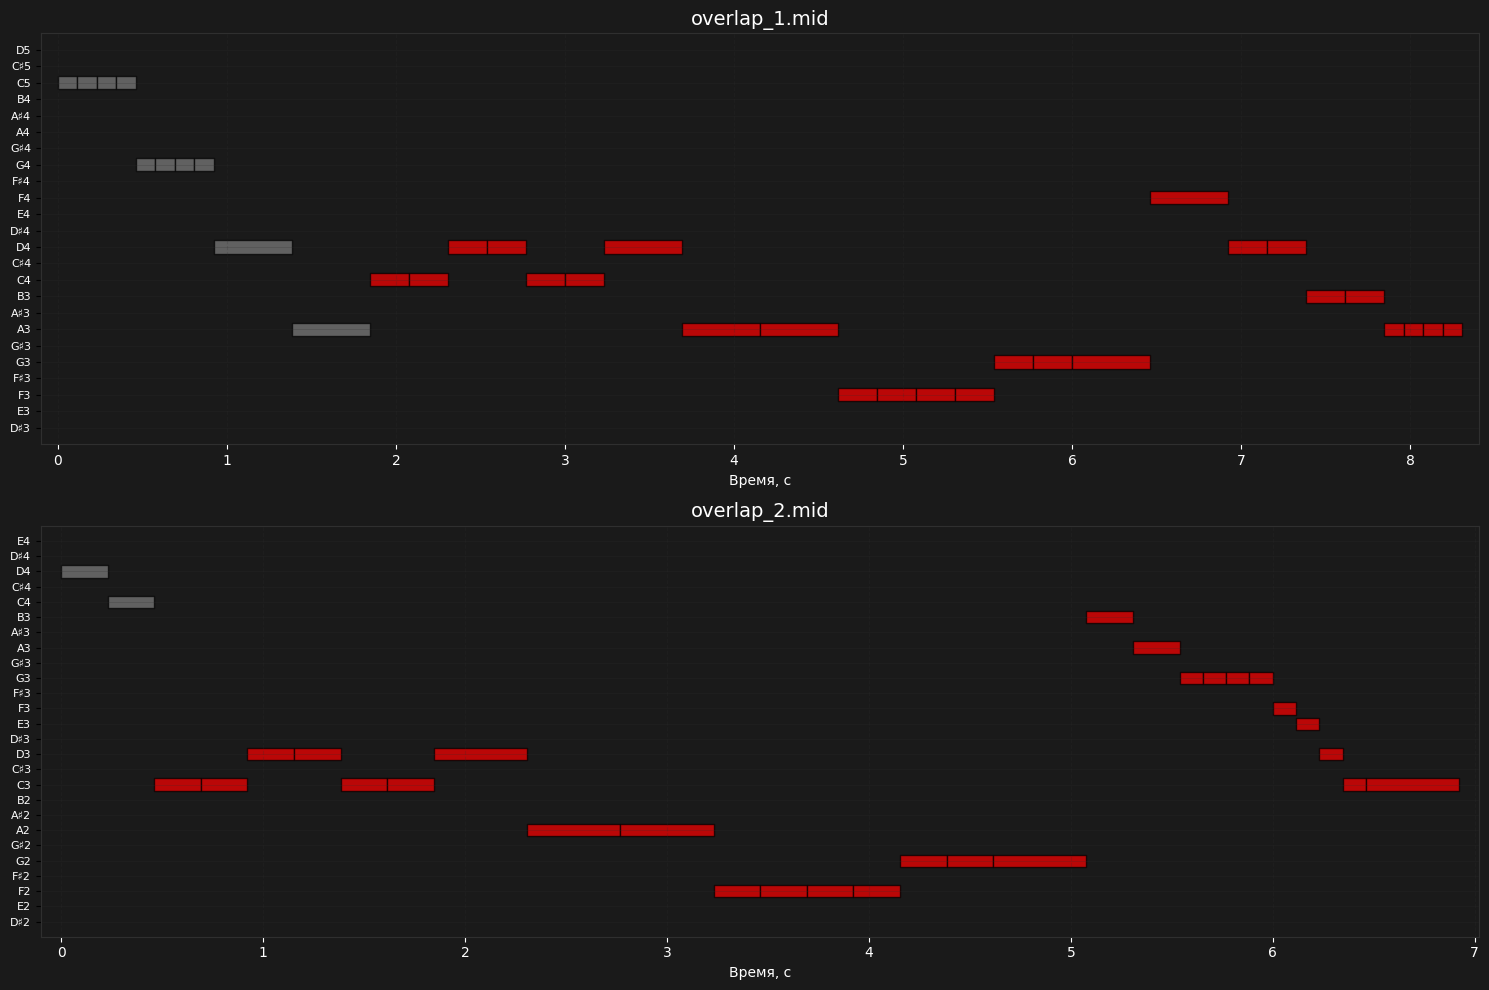

Similarity: 0.72


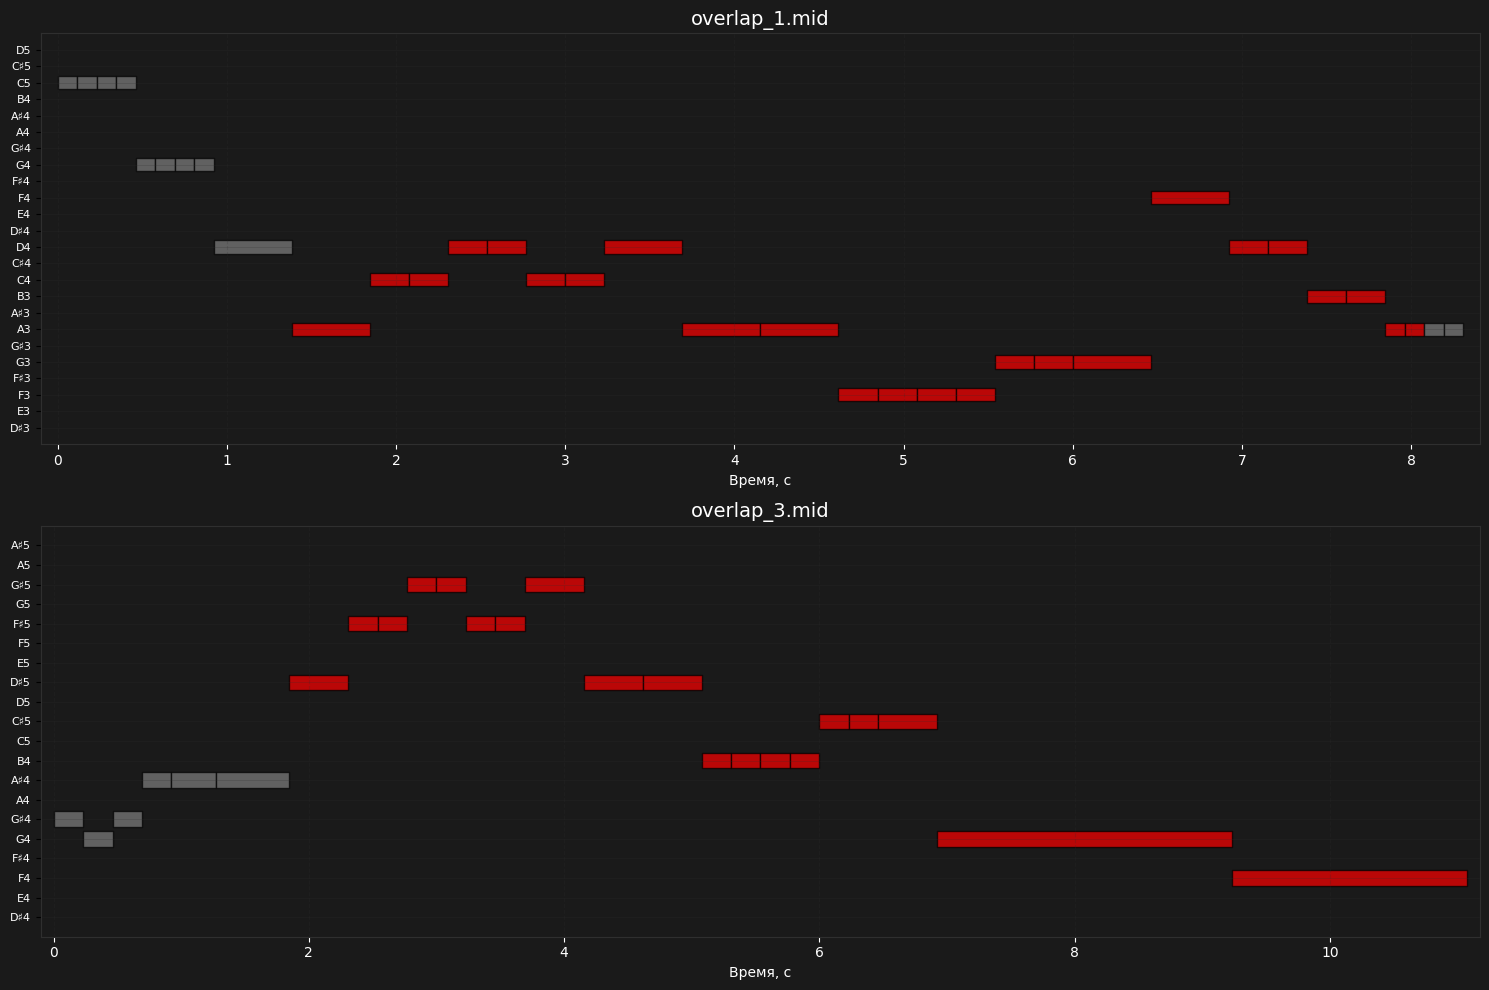

Similarity: 0.81


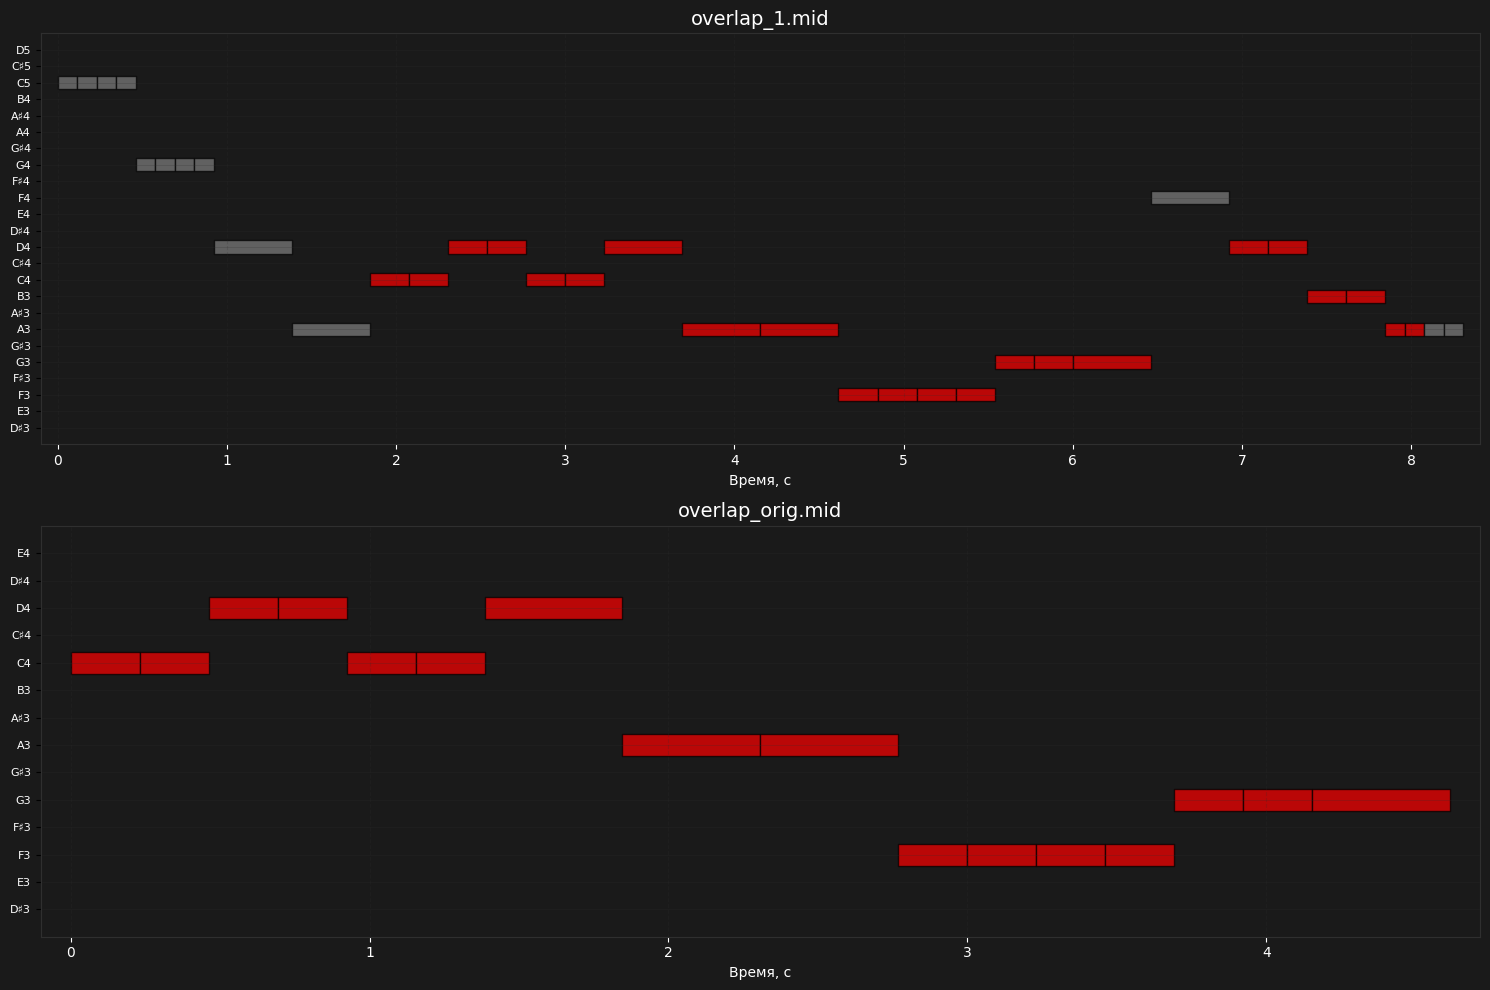

In [3]:
base_melody_path = Path("..\\..\\datasets\\MelodyNet\\test\\labels\\overlap_1.mid")
base_melody = Melody.from_midi(base_melody_path)

overlap_files = sorted([
    f for f in Path("..\\..\\datasets\\MelodyNet\\test\\labels").glob("overlap_*.mid") 
    if f.name != base_melody_path.name
])

for overlap_file in overlap_files:

    melody2 = Melody.from_midi(overlap_file)
    
    matcher = SmithWatermanMelodyMatcher(base_melody, melody2)
    patterns = matcher.find_patterns(
        min_length=MIN_LENGTH, 
        match_score=MATCH_SCORE, 
        mismatch_score=MISMATCH_SCORE, 
        gap_penalty=GAP_PENALTY, 
        tolerance=TOLERANCE,
        threshold_ratio=THRESHOLD_RATIO
    )
        
    print(f"Similarity: {matcher.calculate_similarity():.2f}")
    matcher.visualize_matches(subplot_titles=(base_melody_path.name, overlap_file.name), subplot_title_fontsize=14)

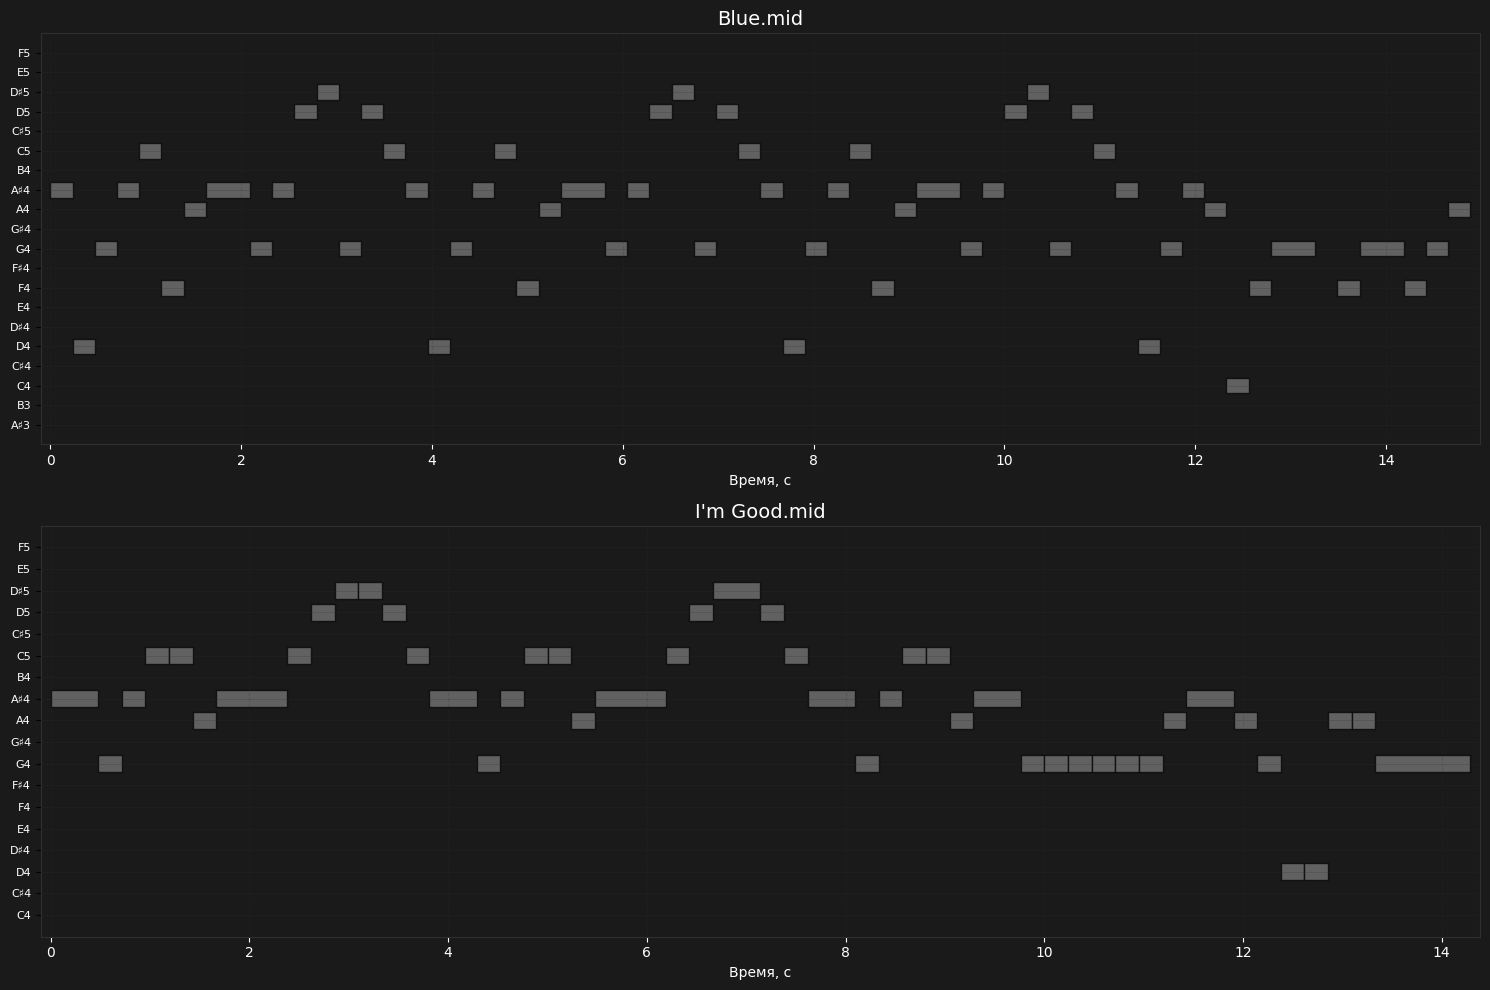

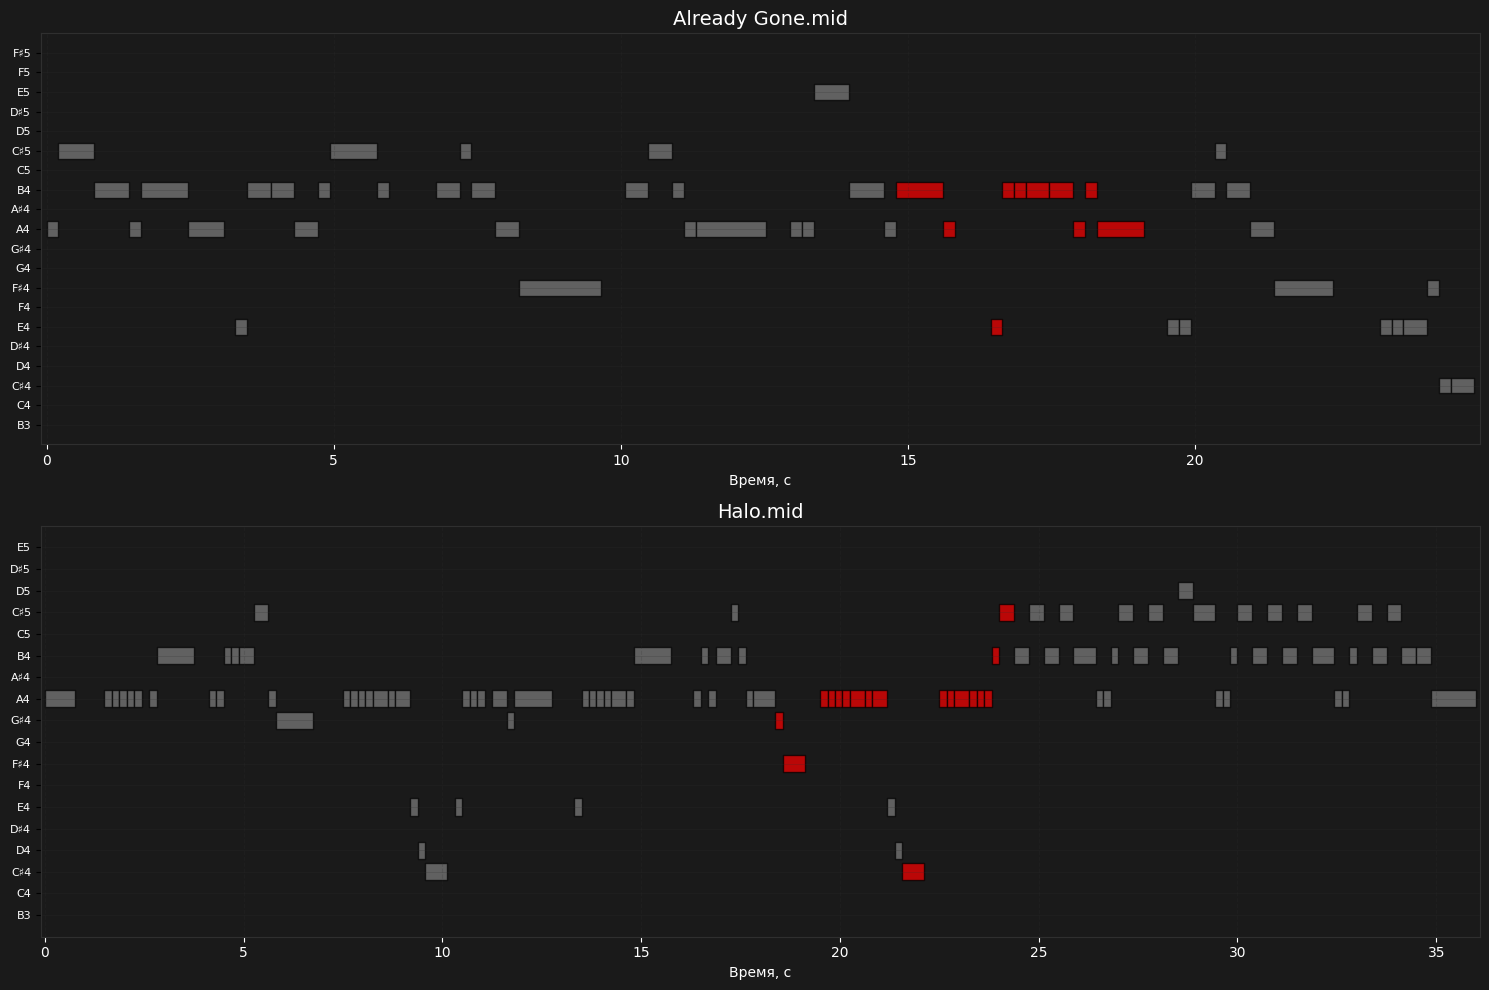

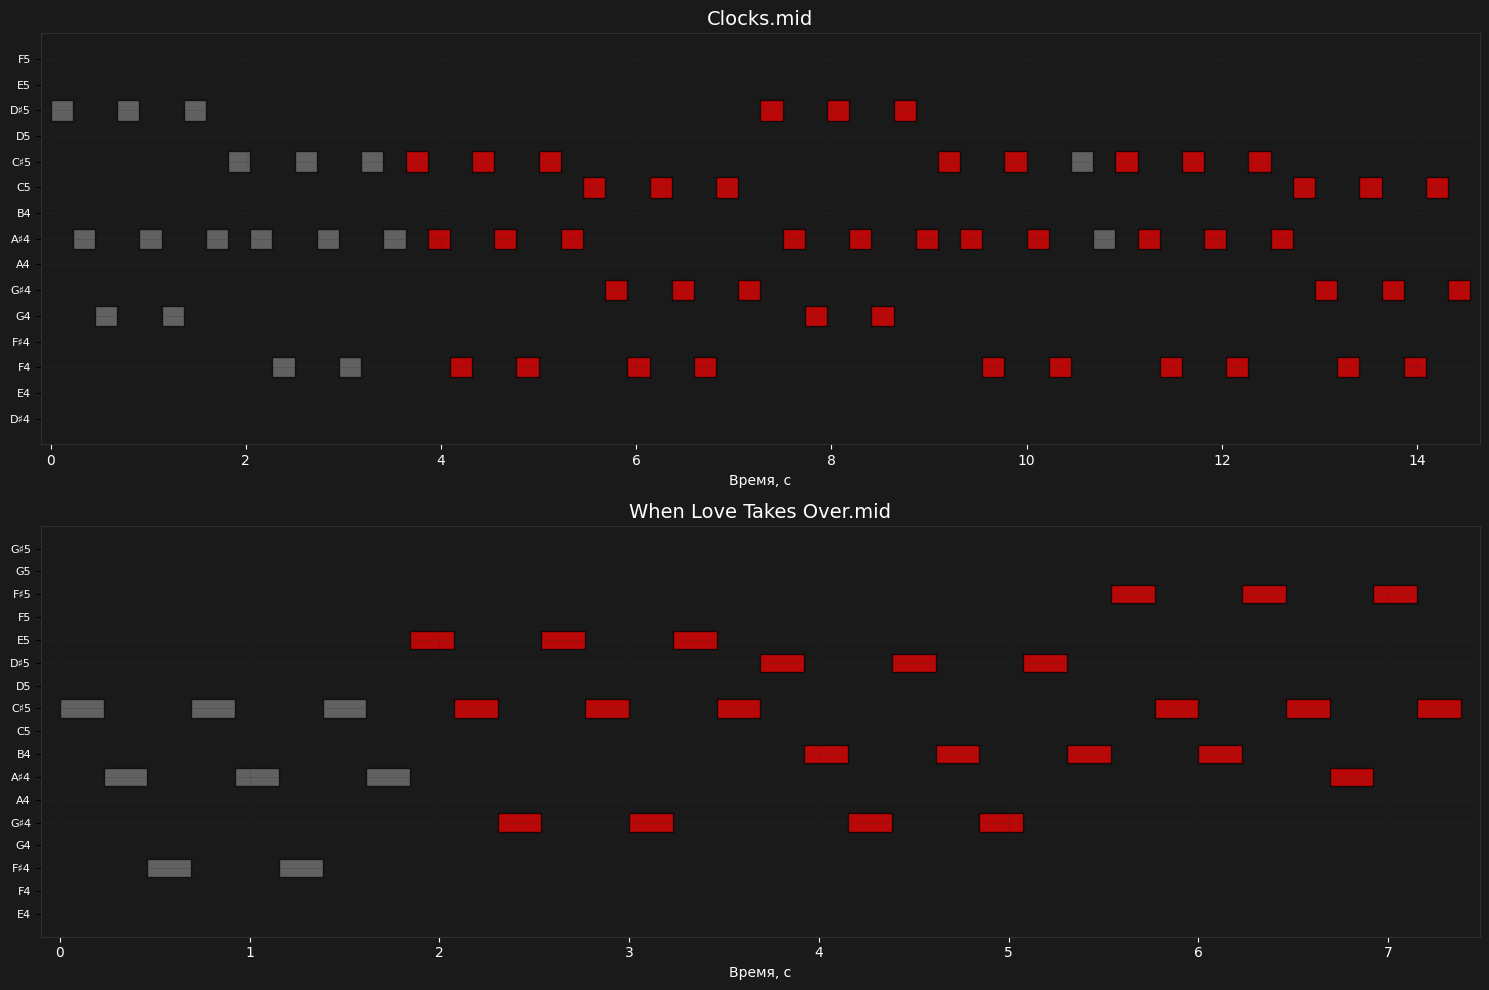

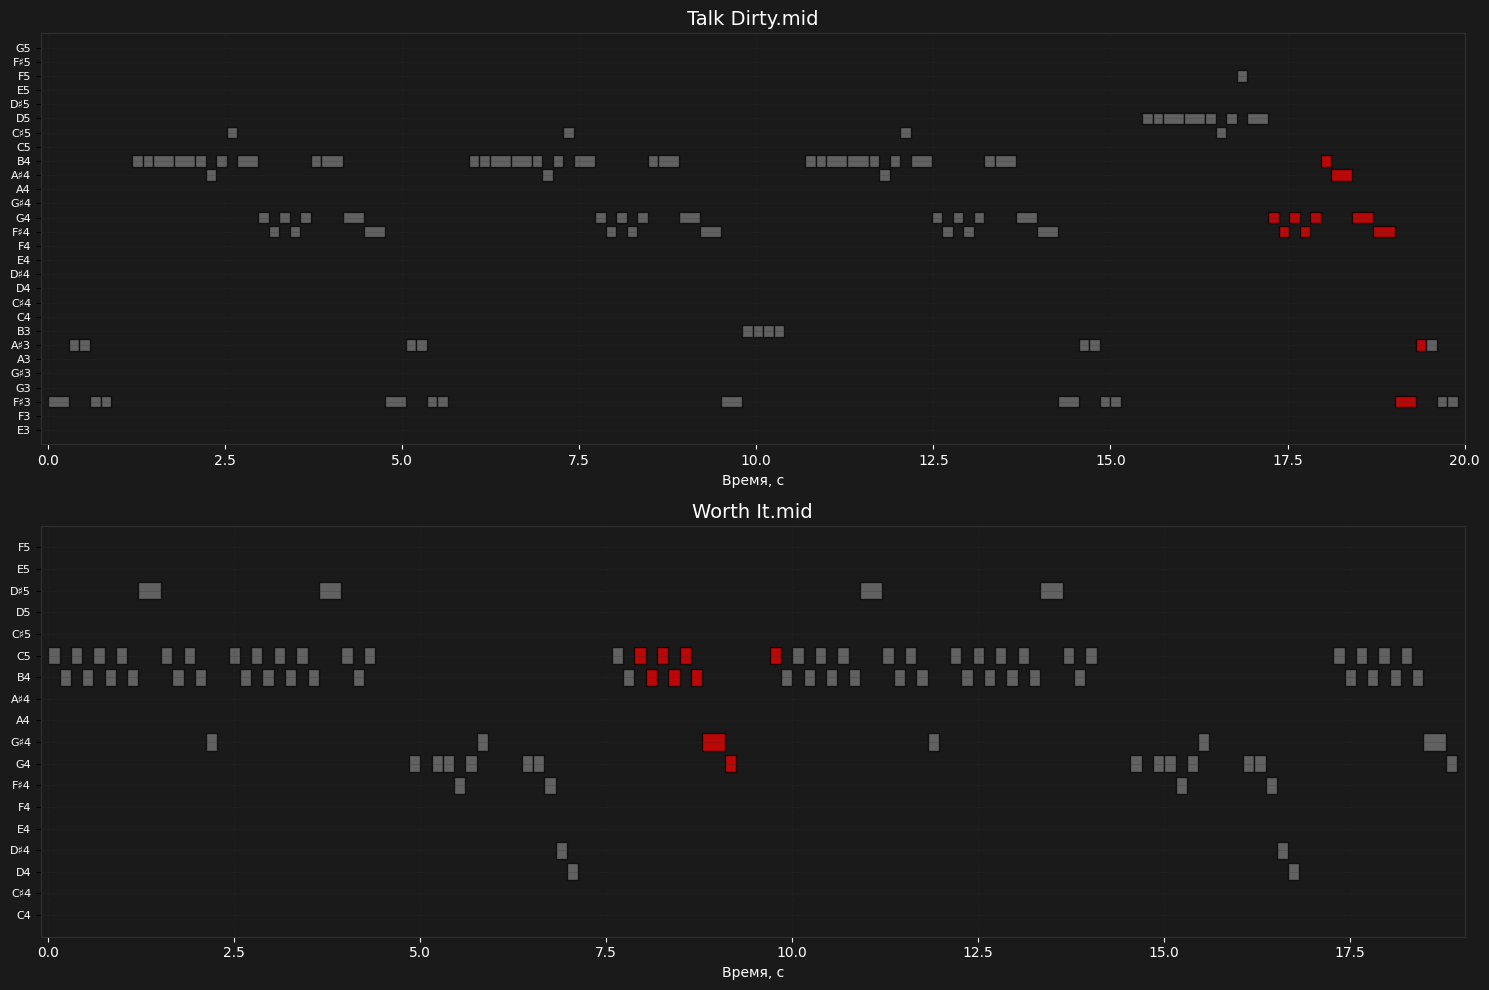

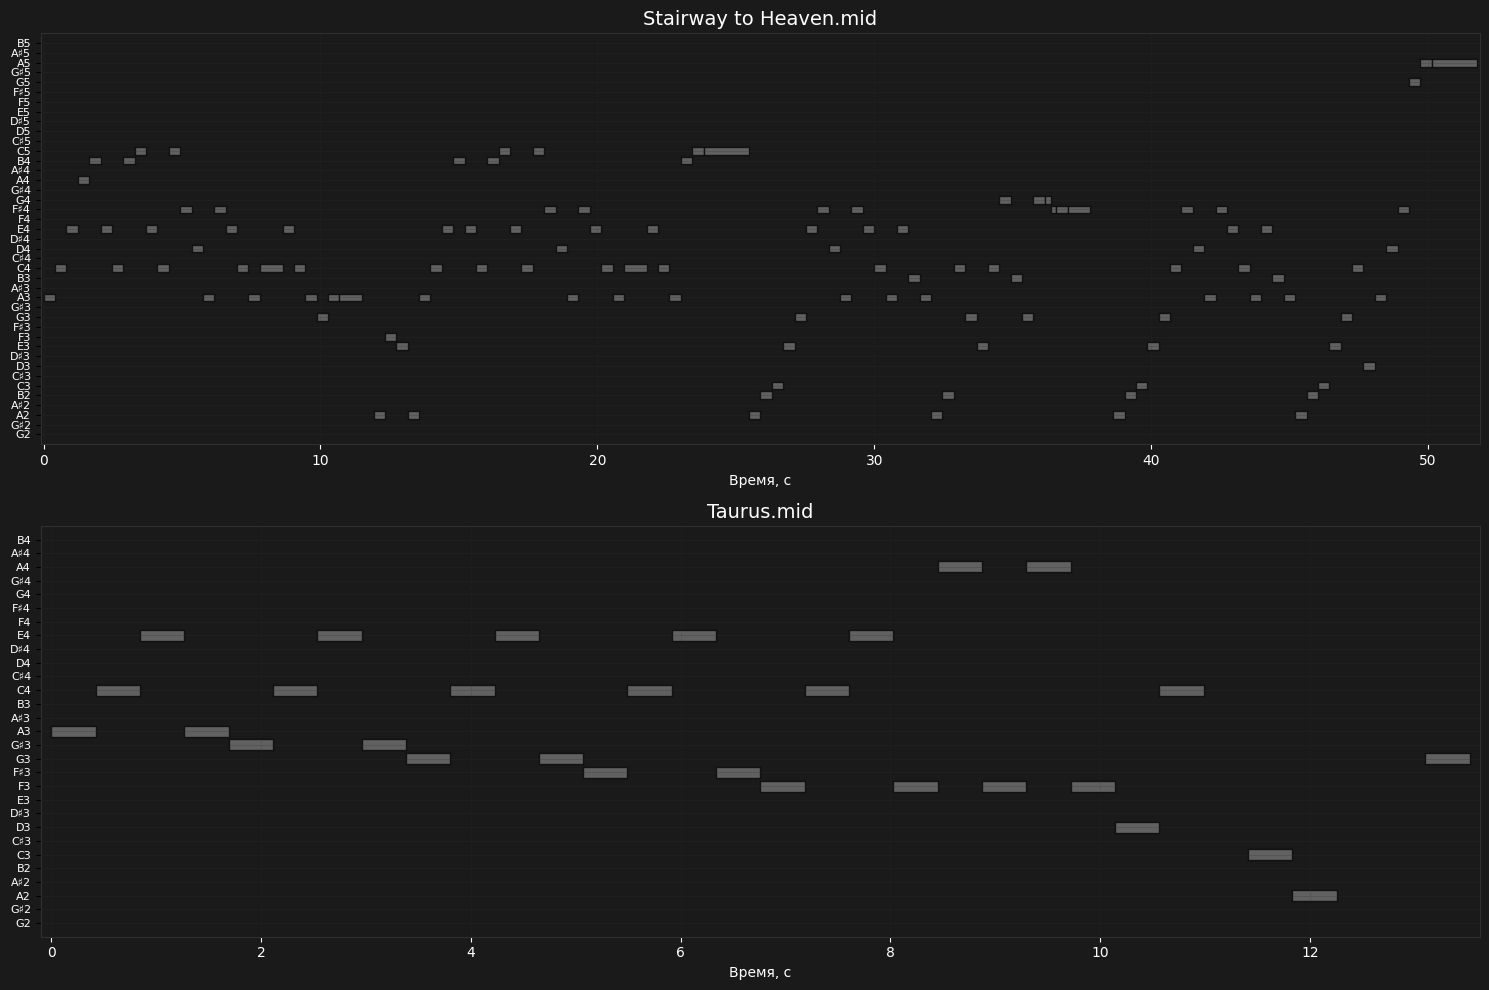

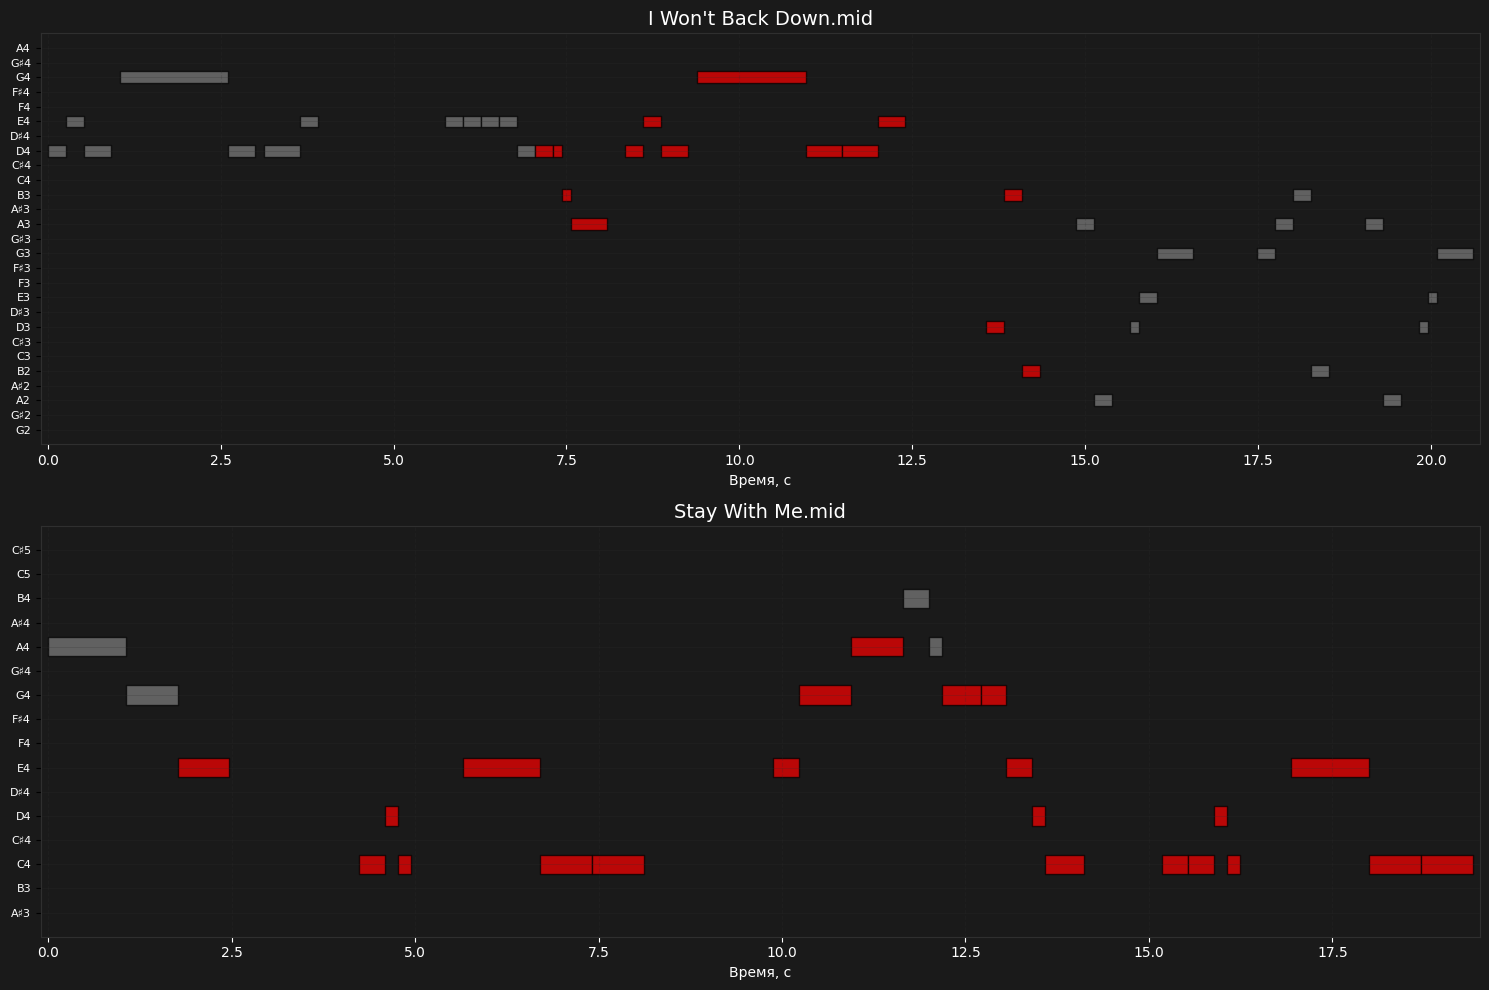

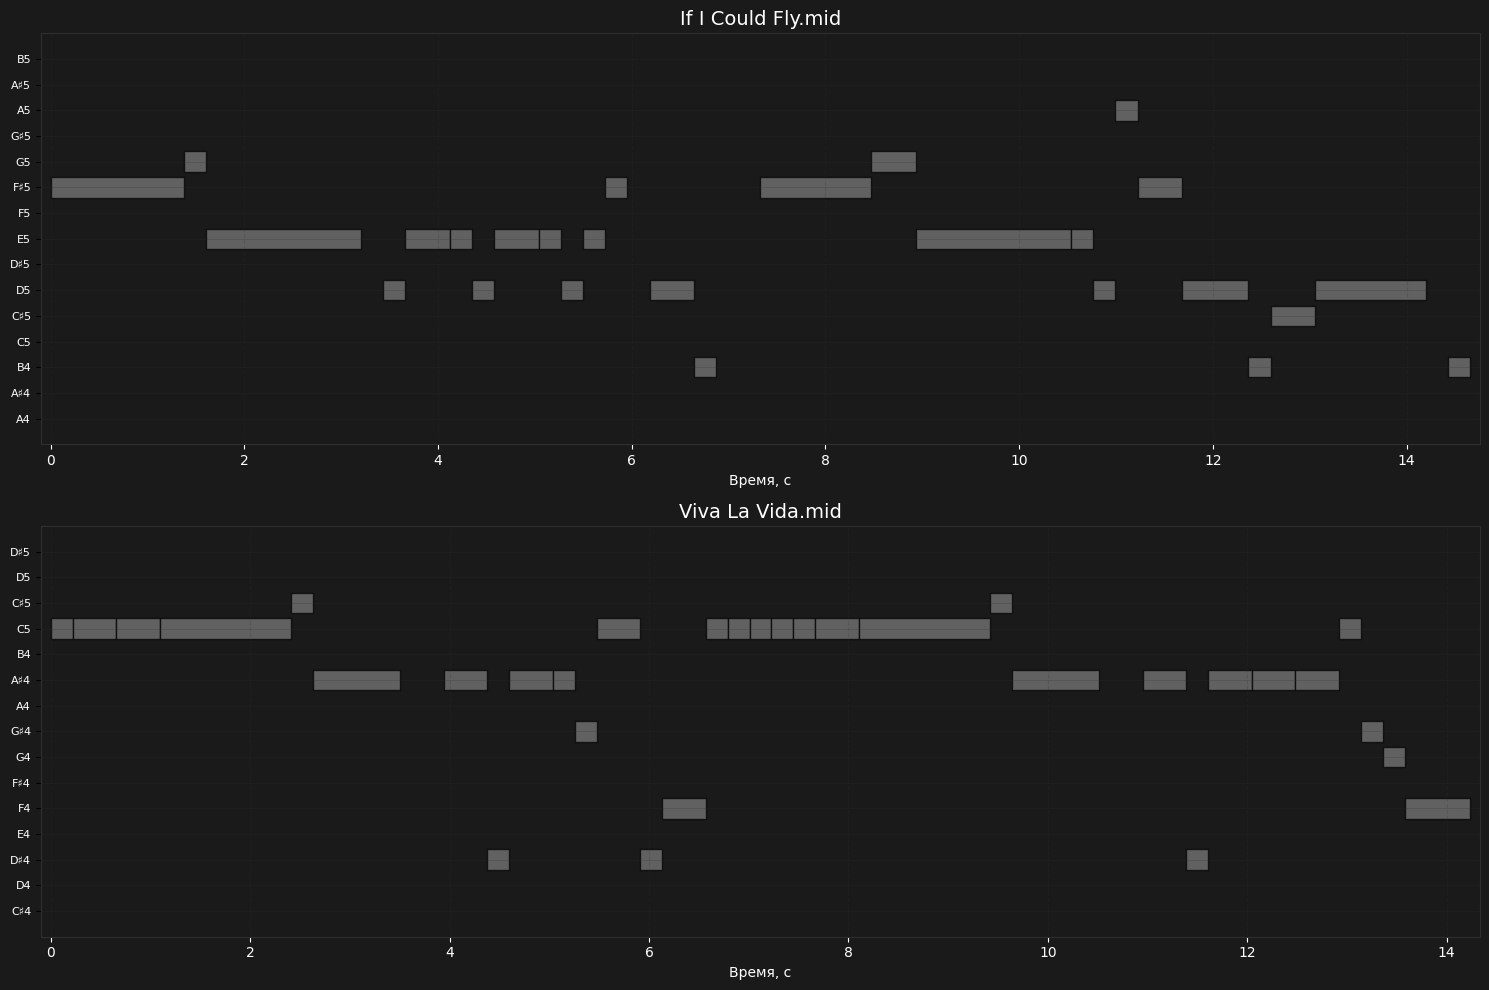

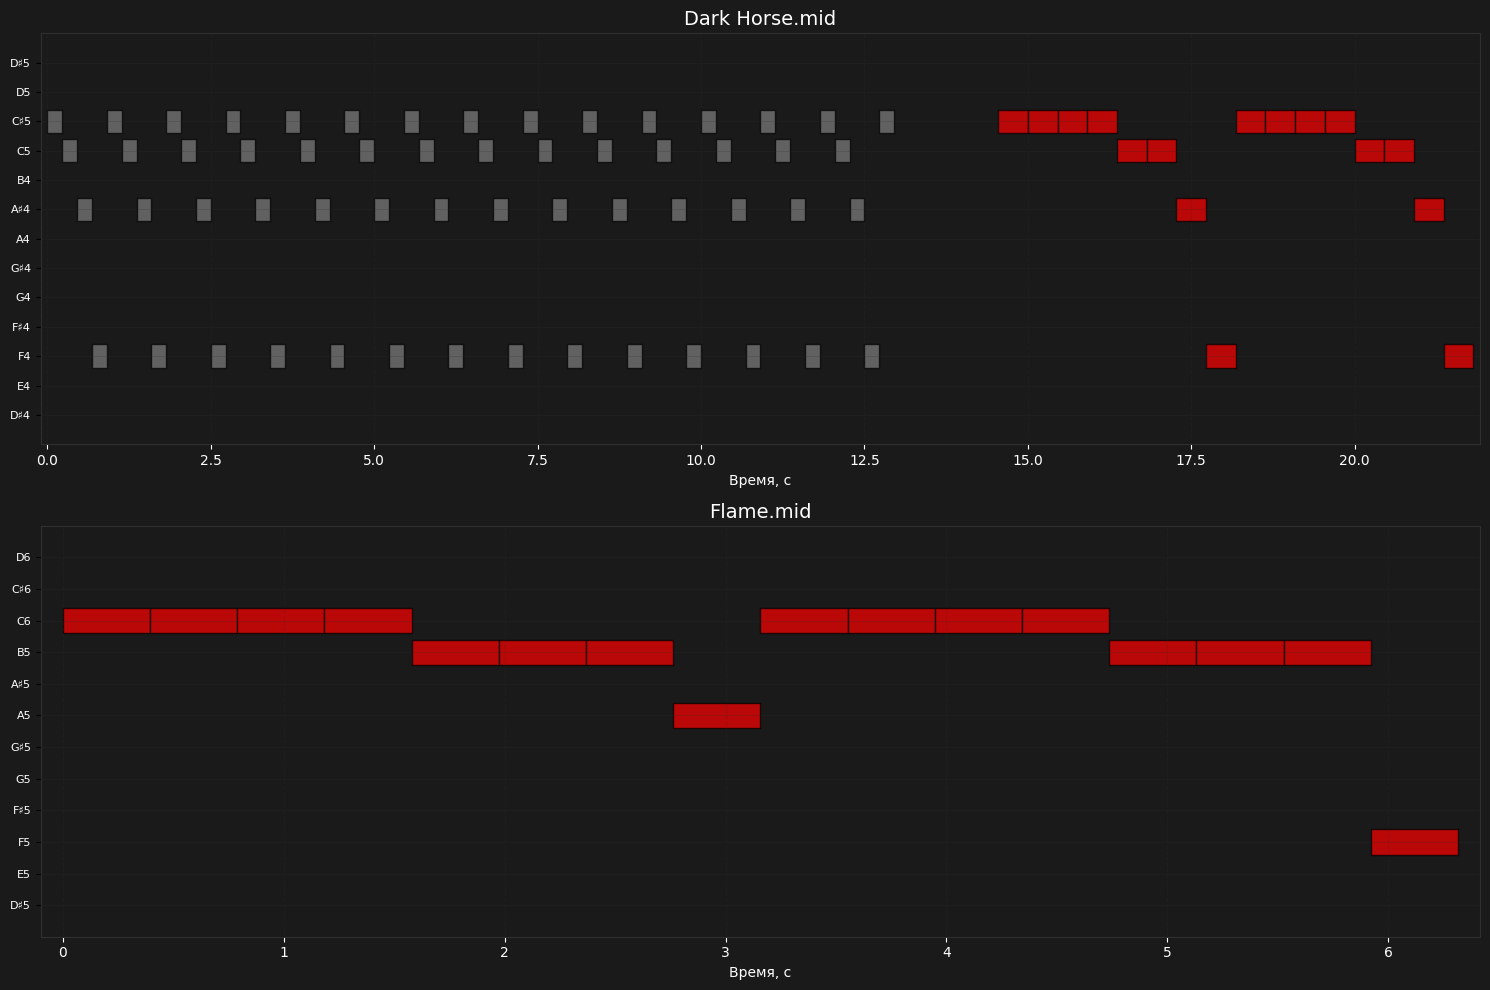

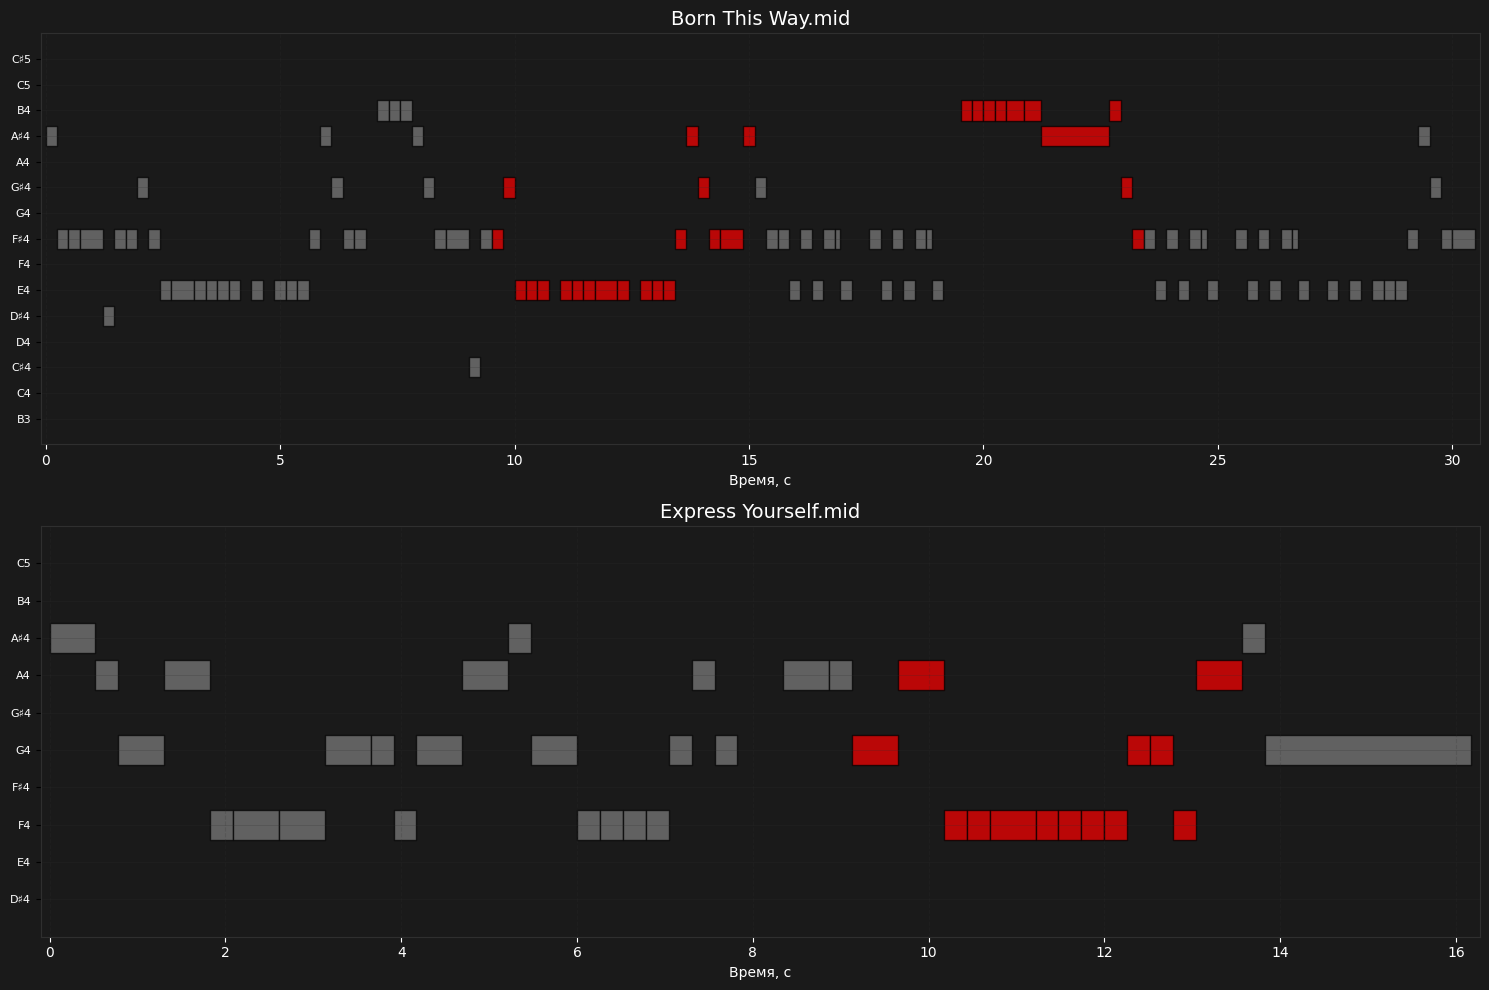

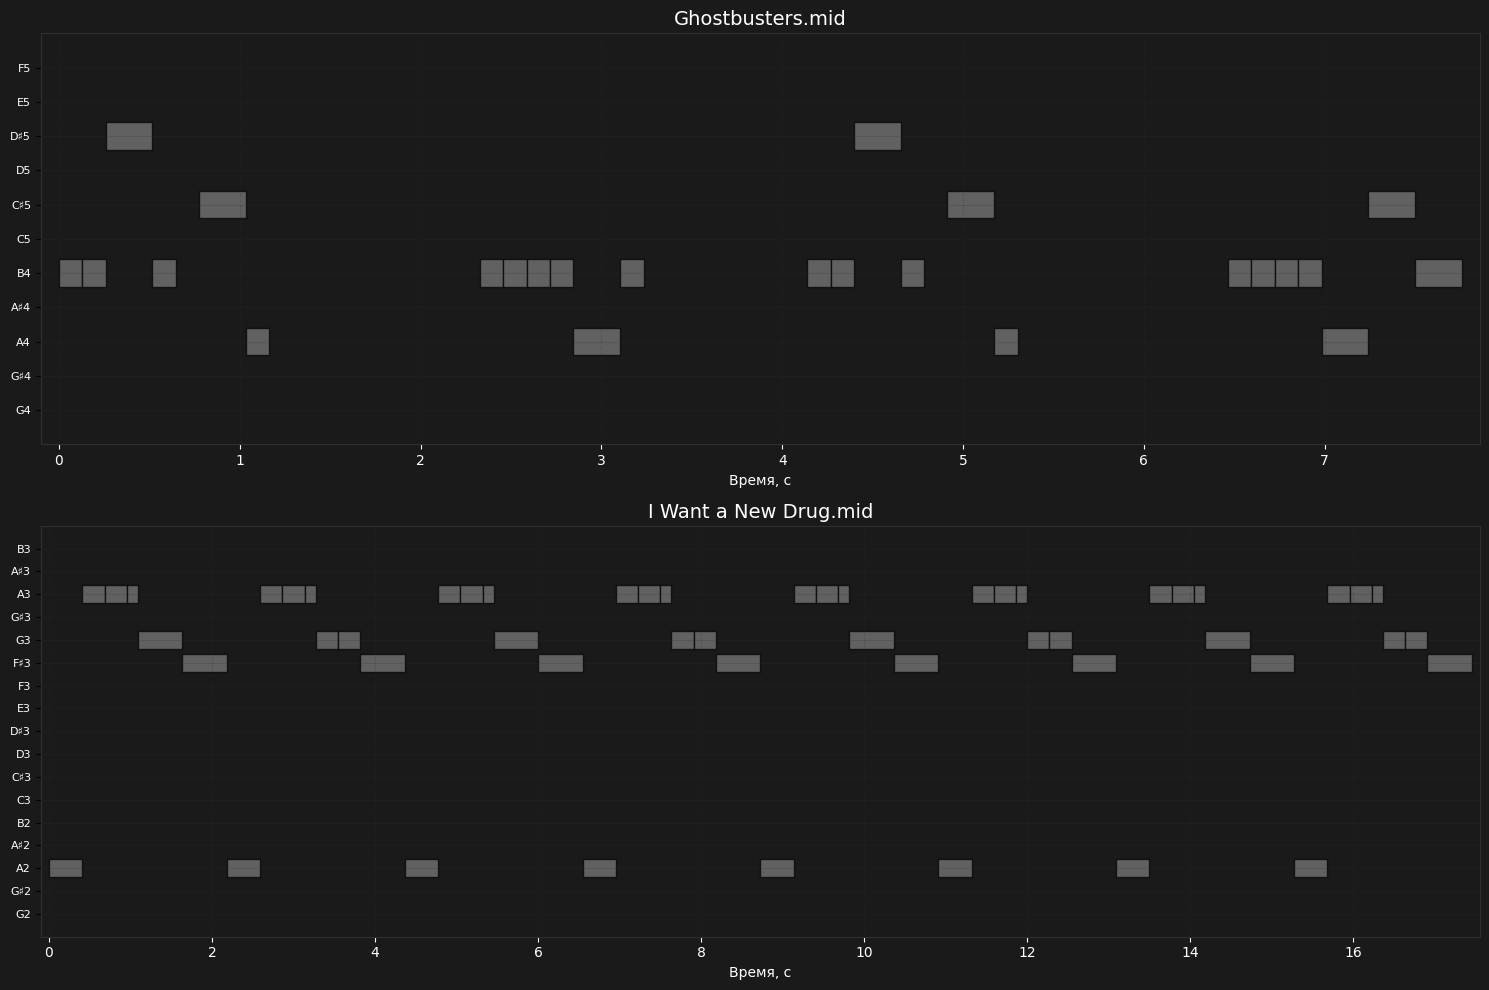

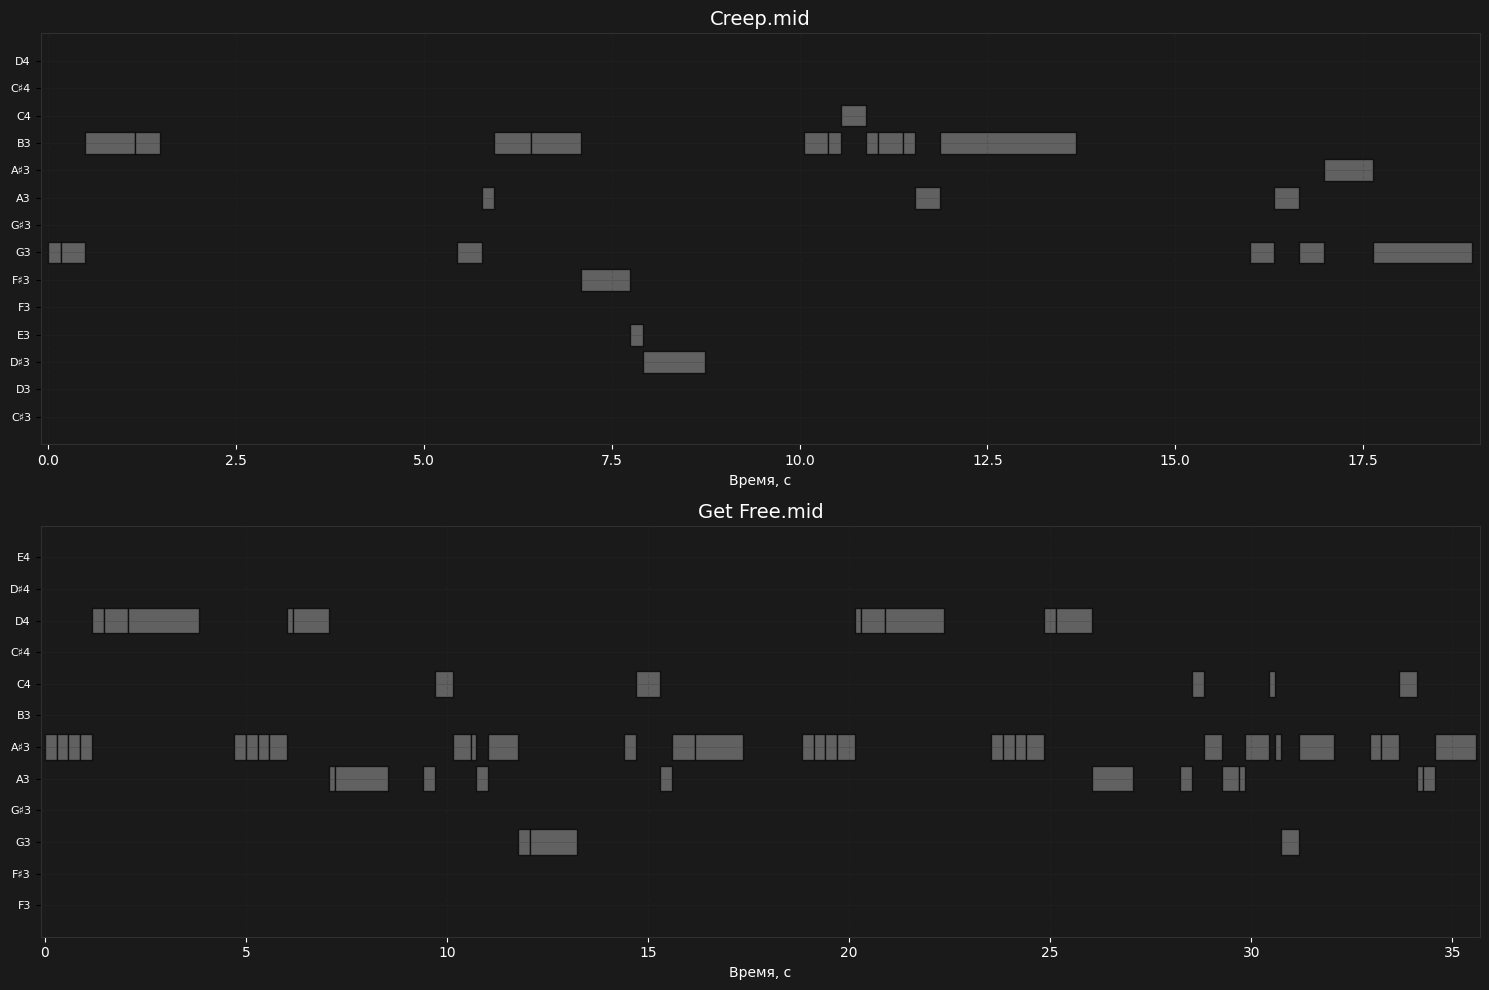

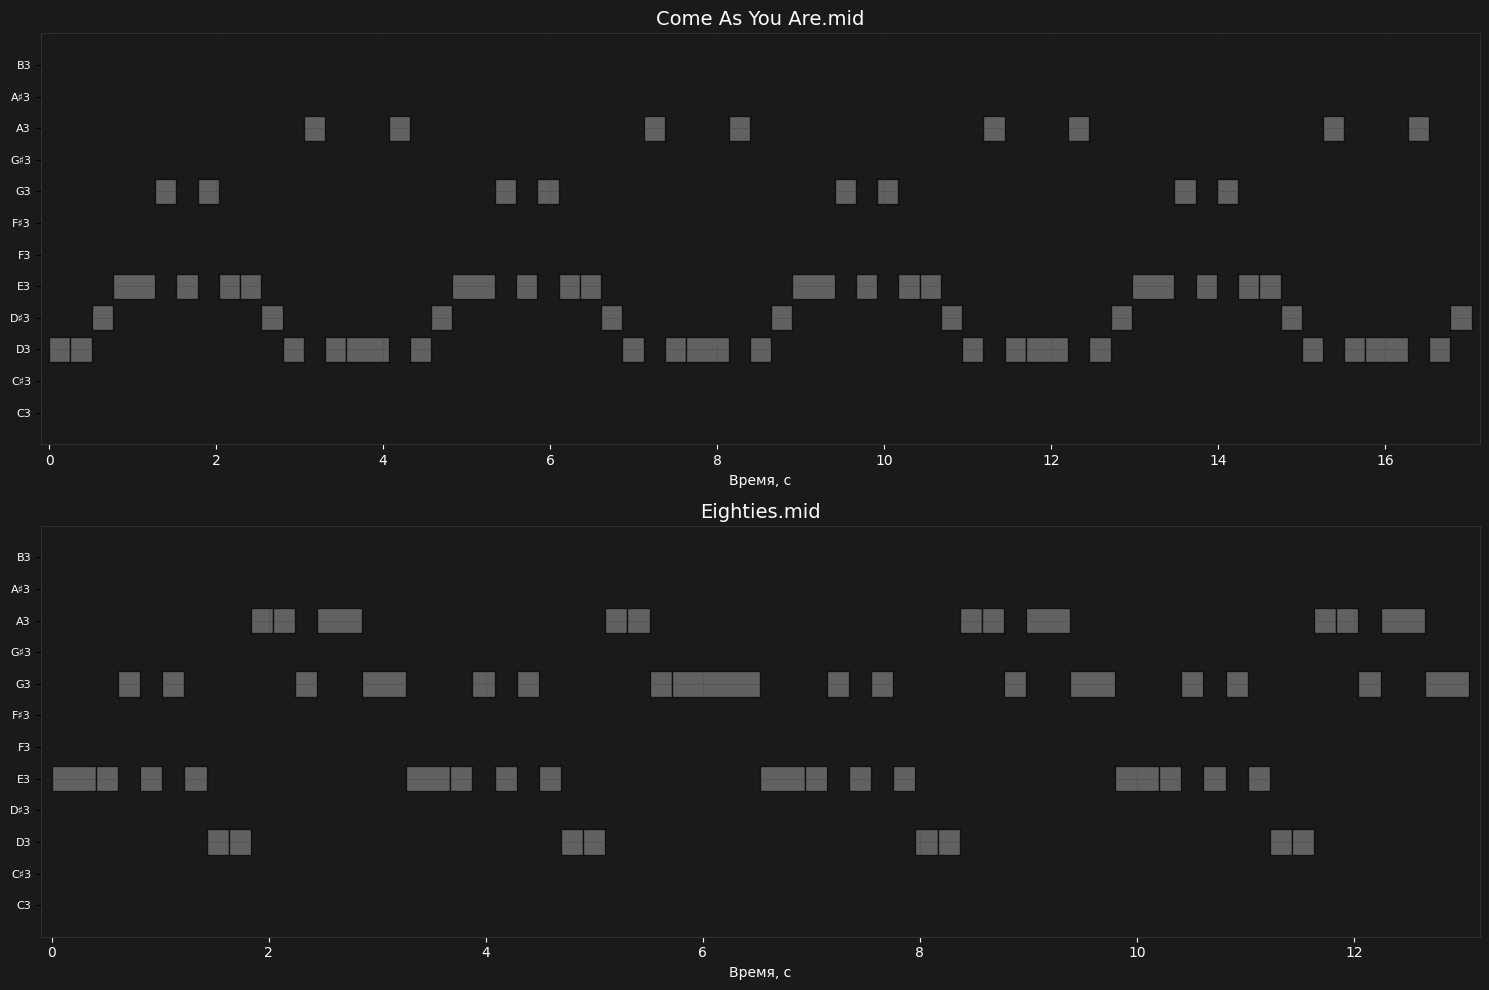

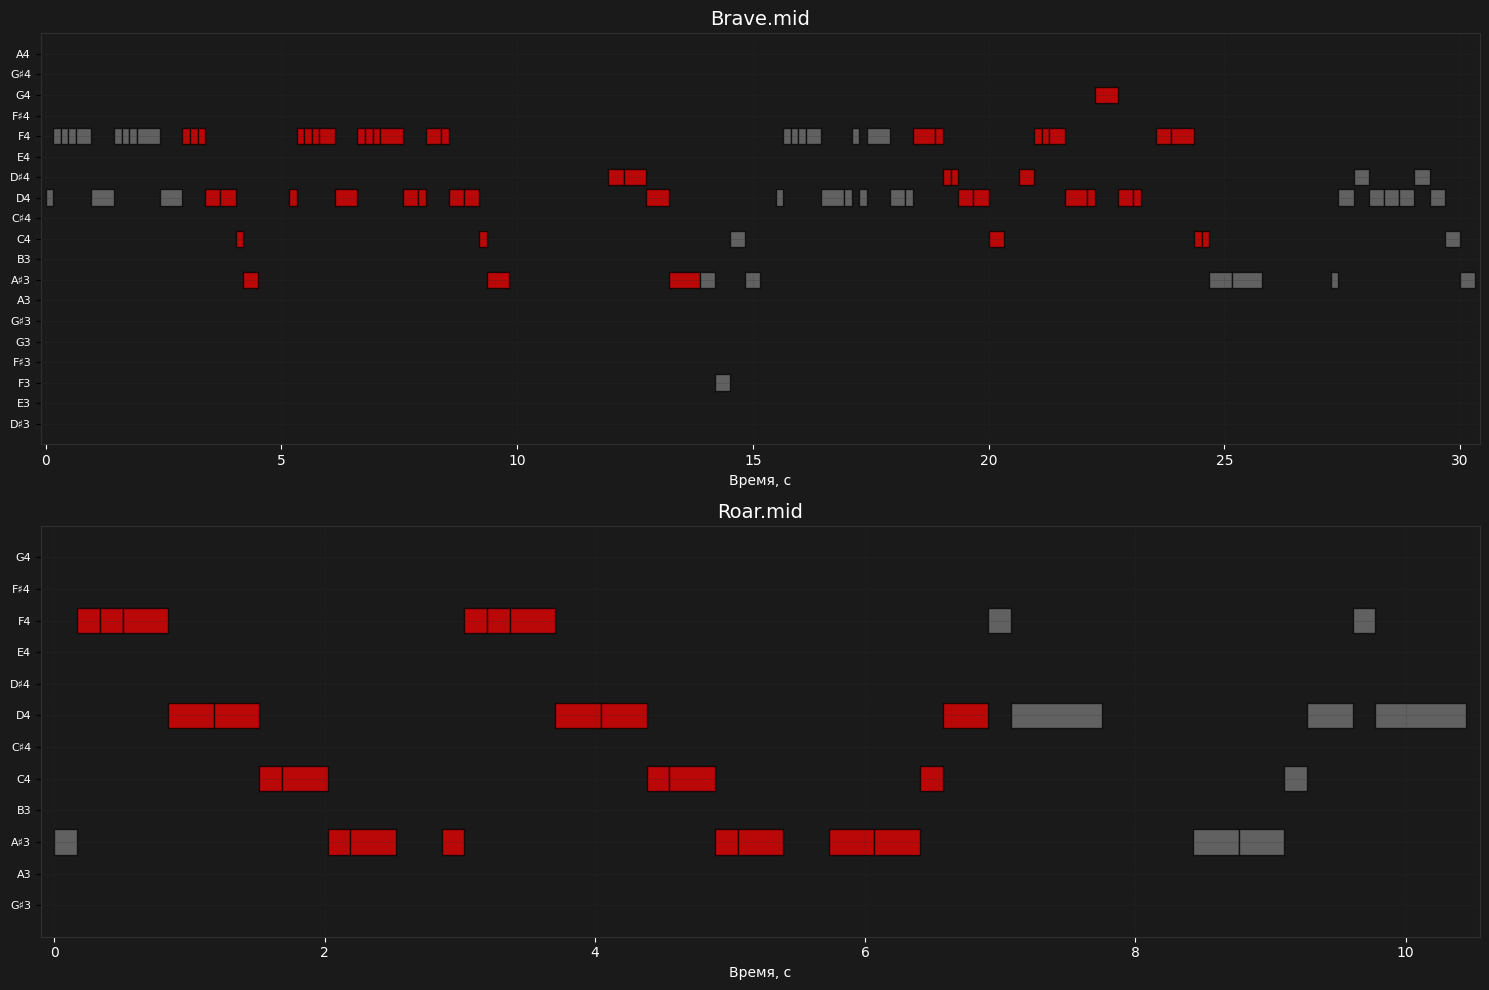

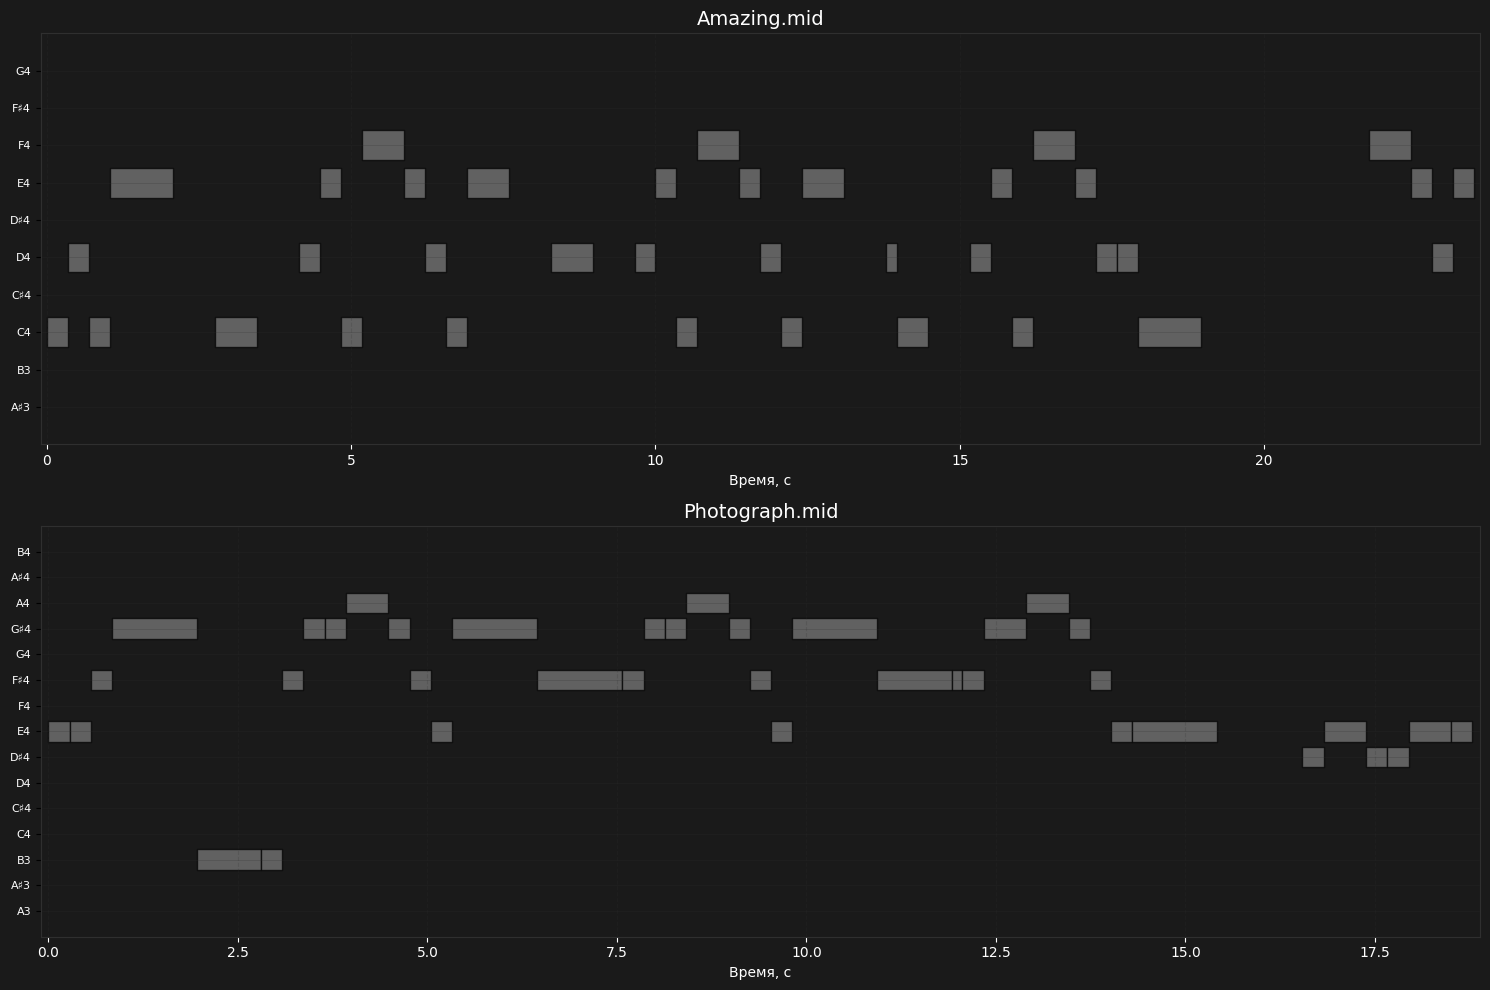

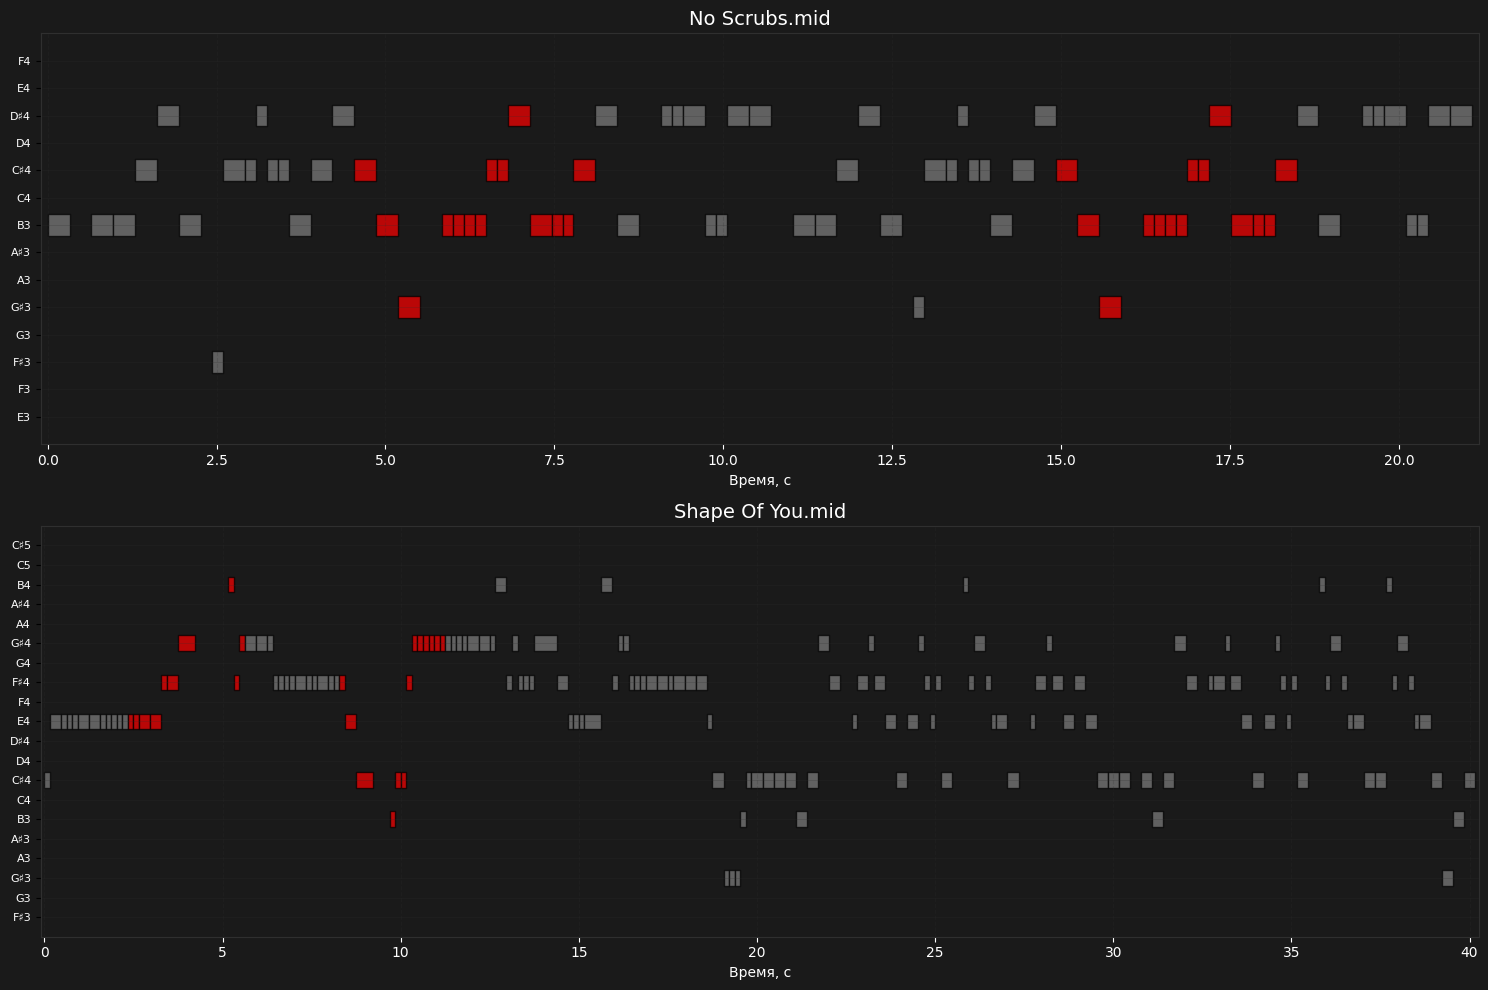

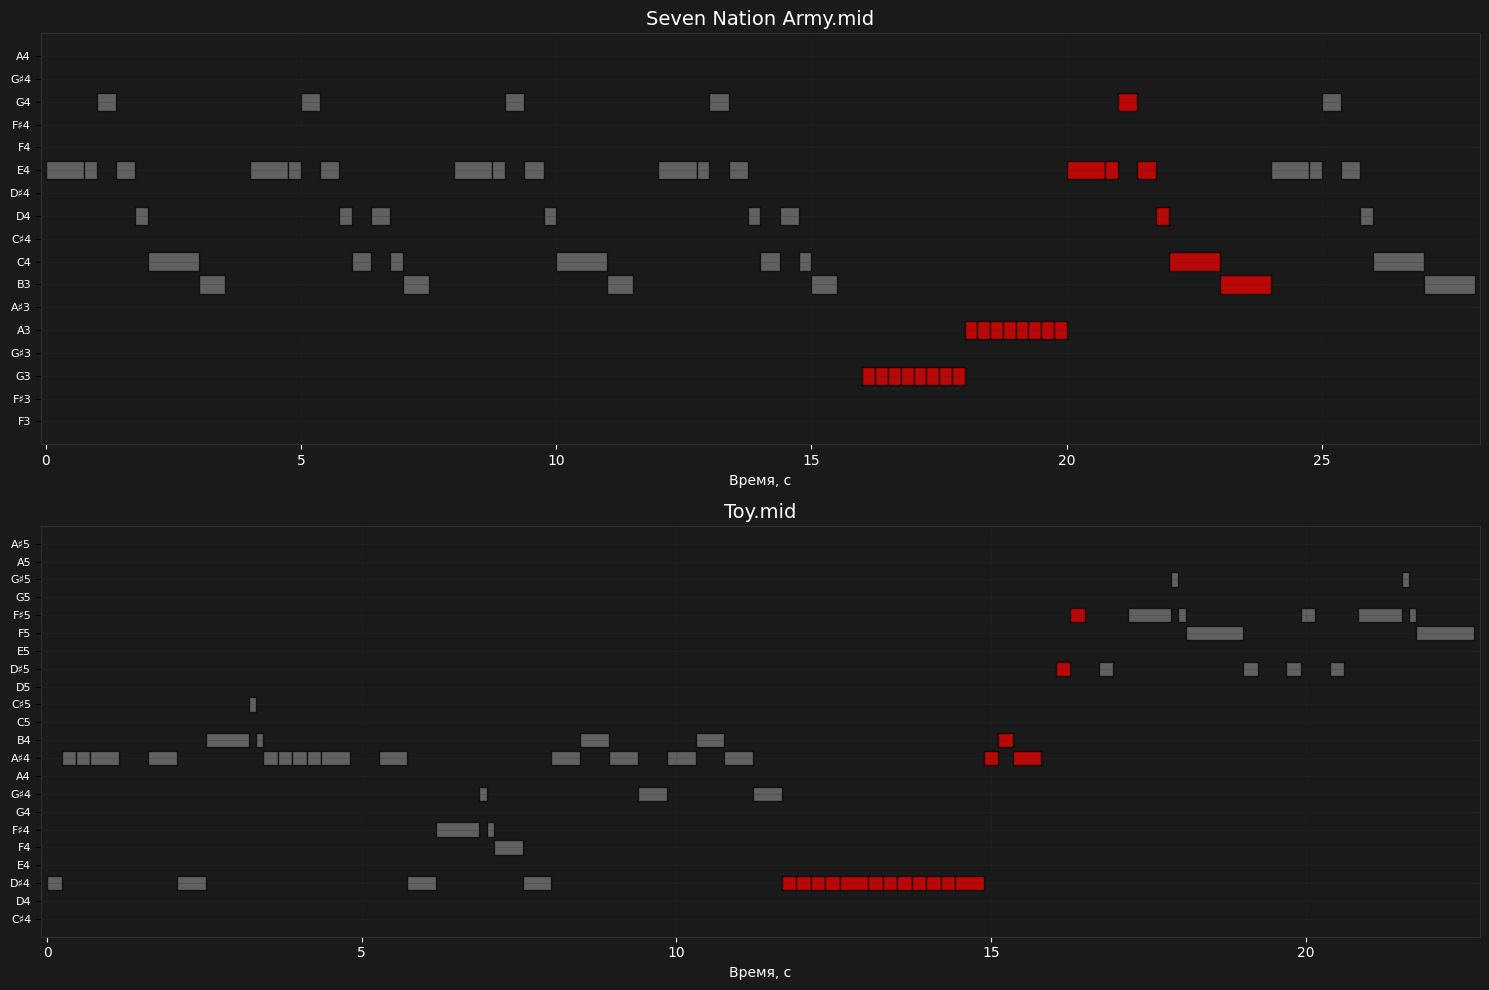

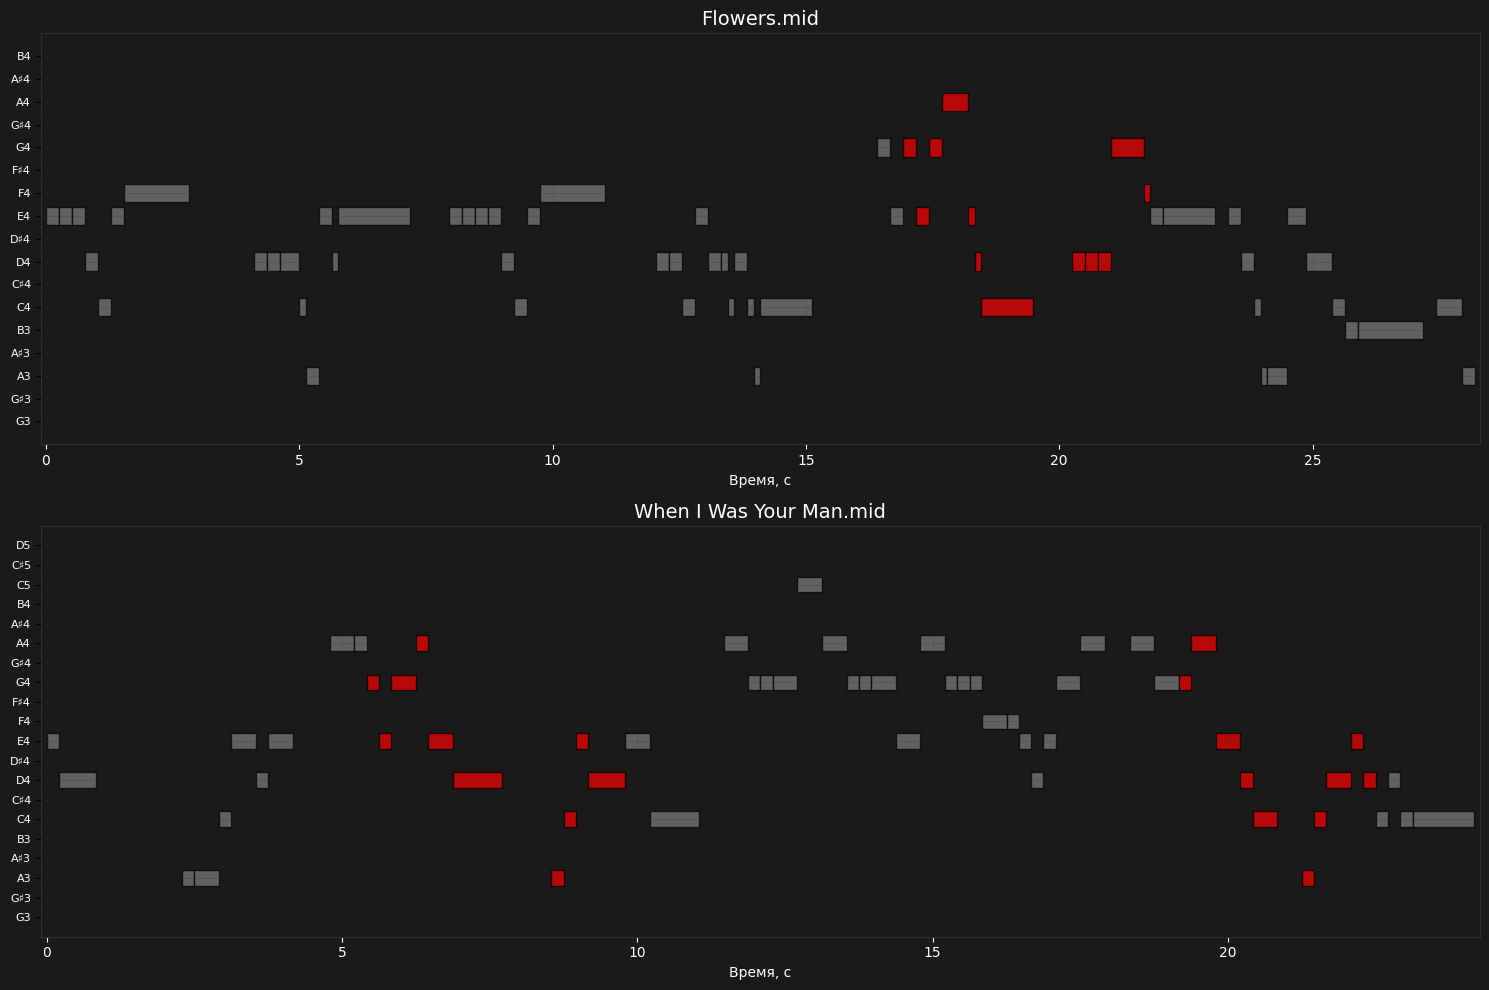

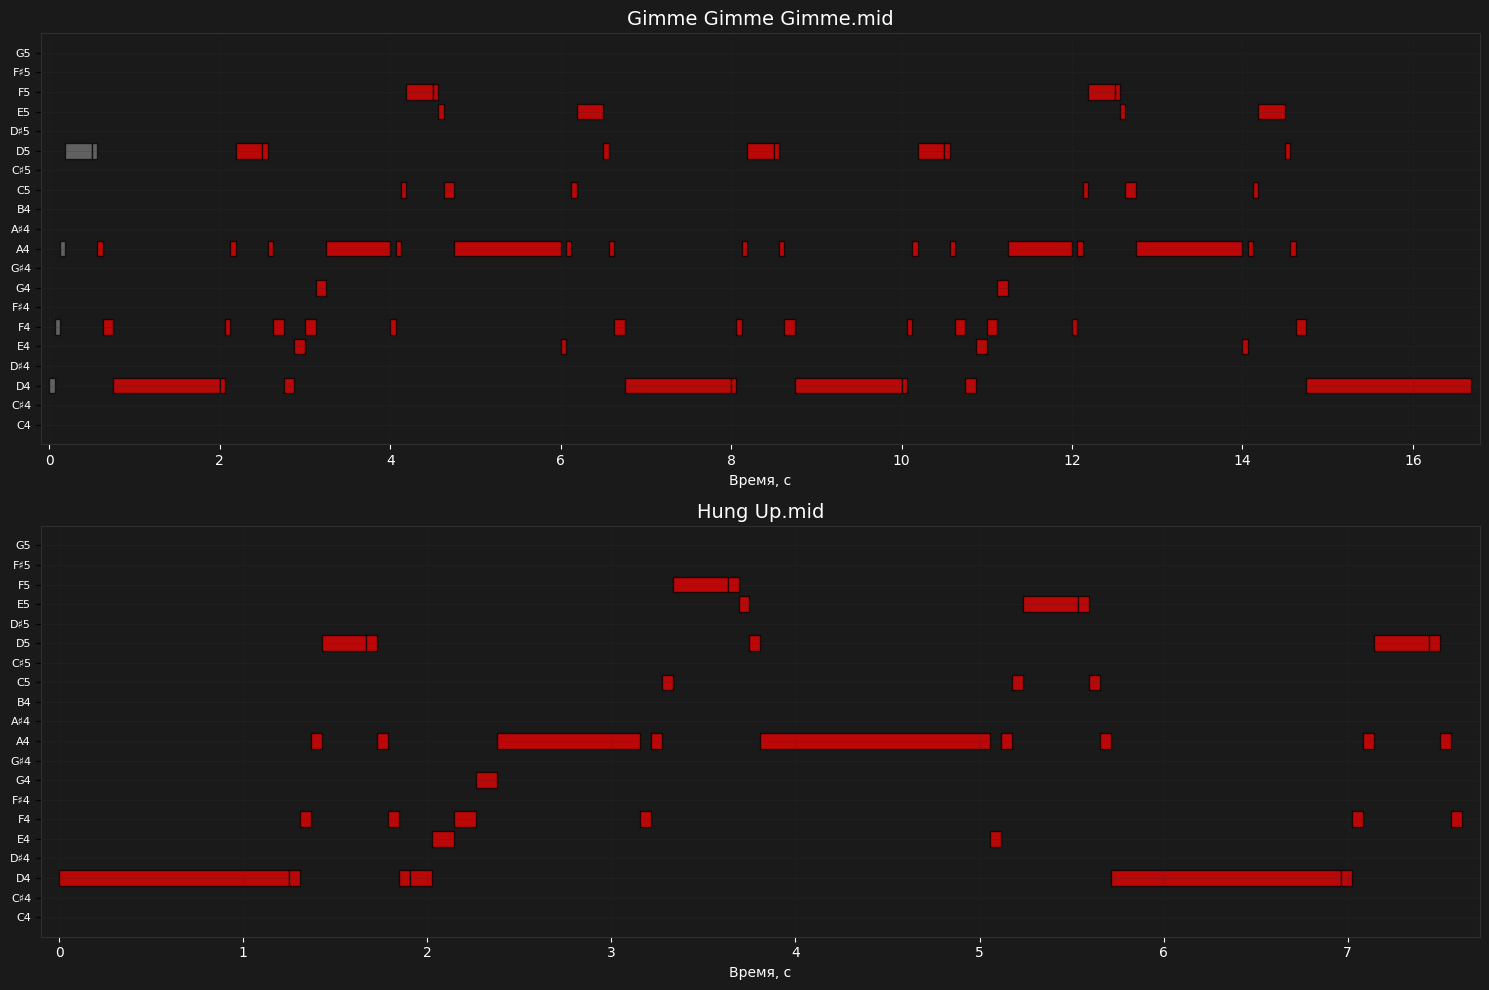

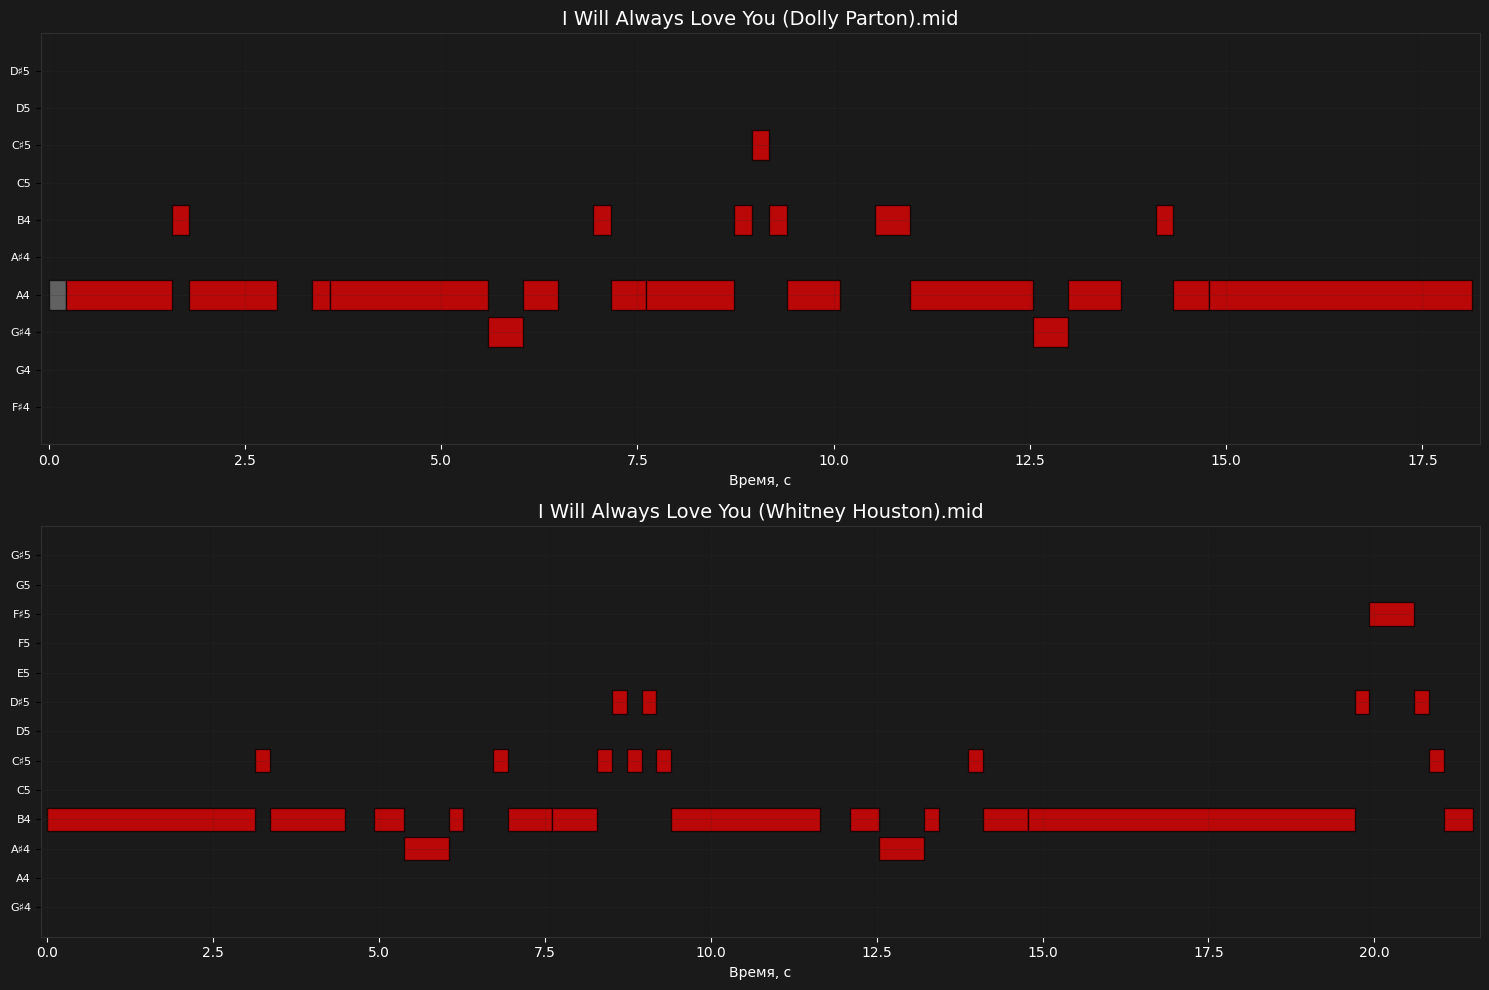

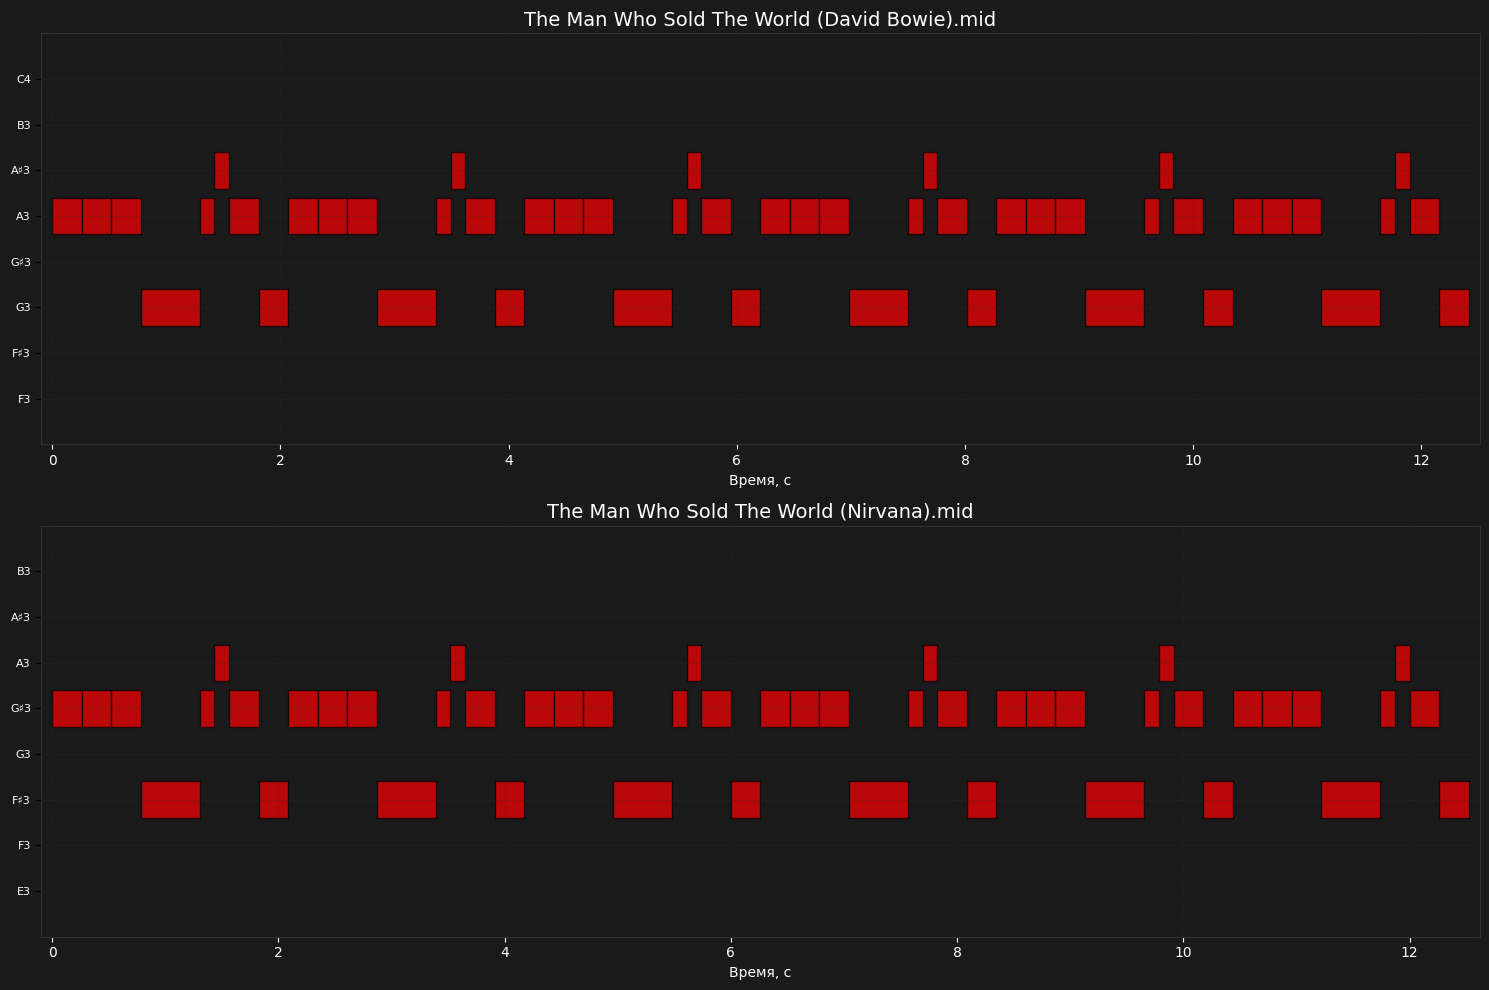

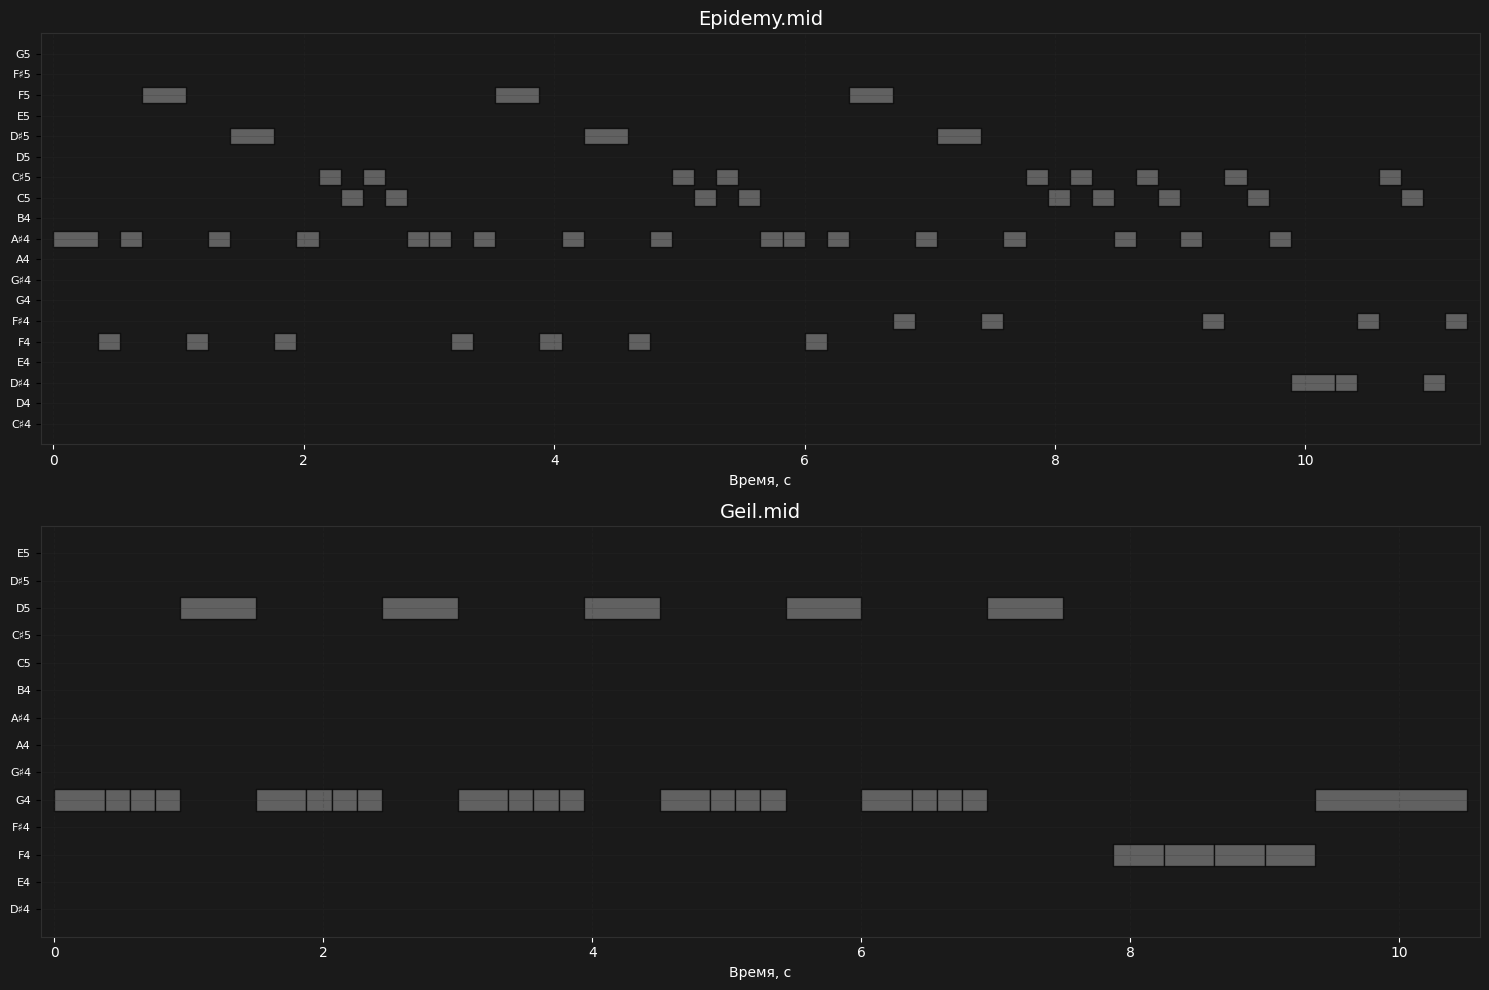

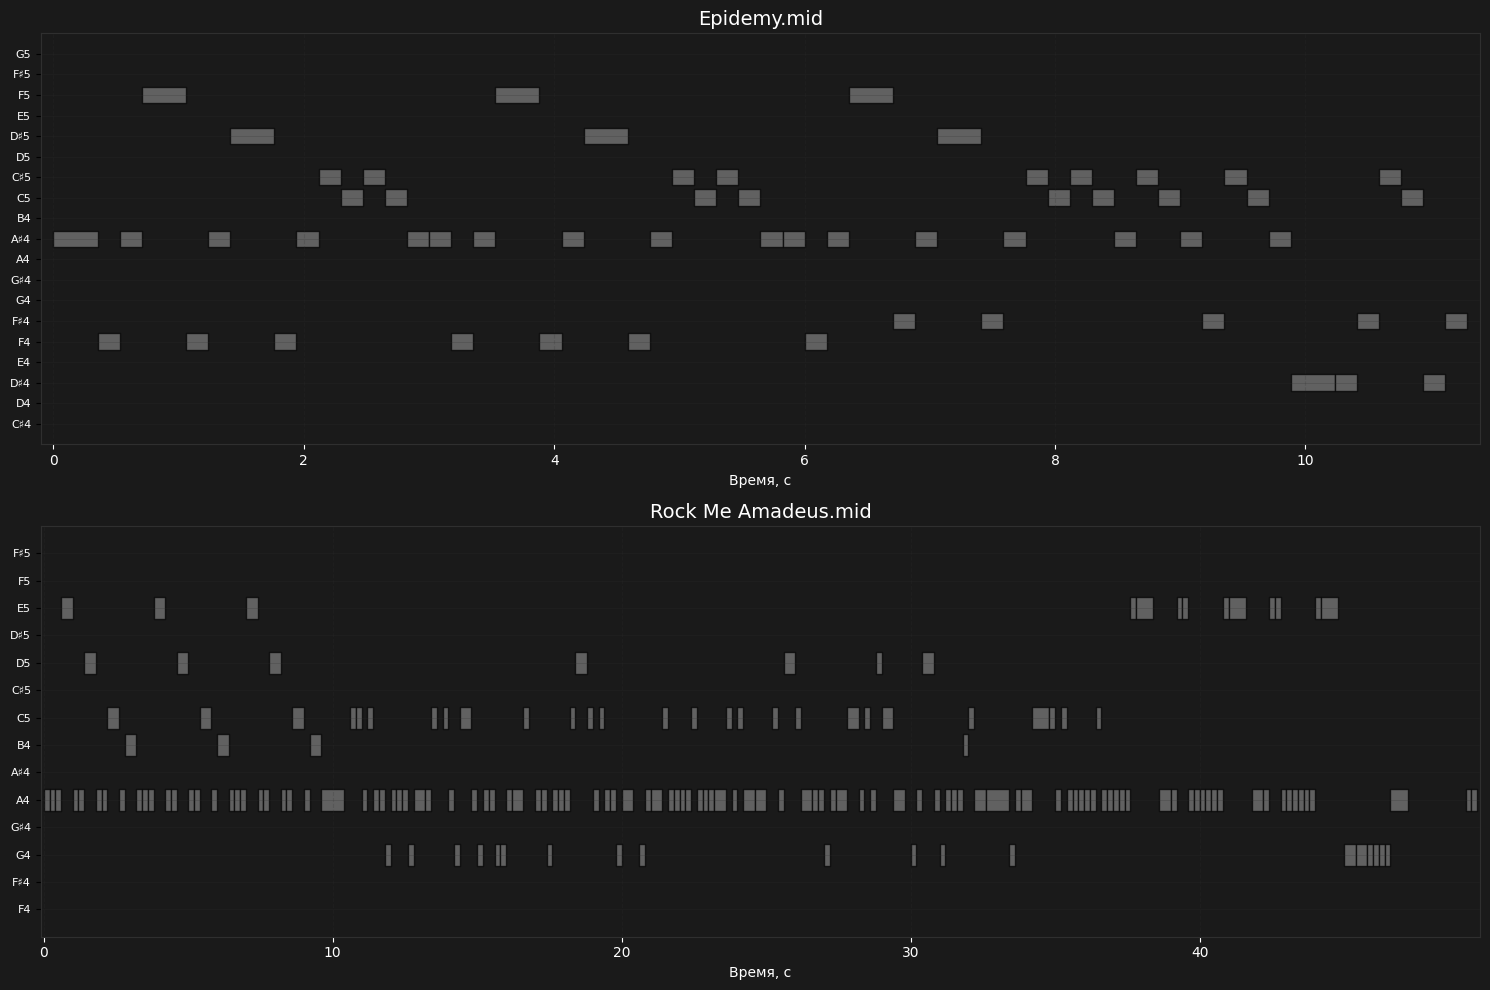

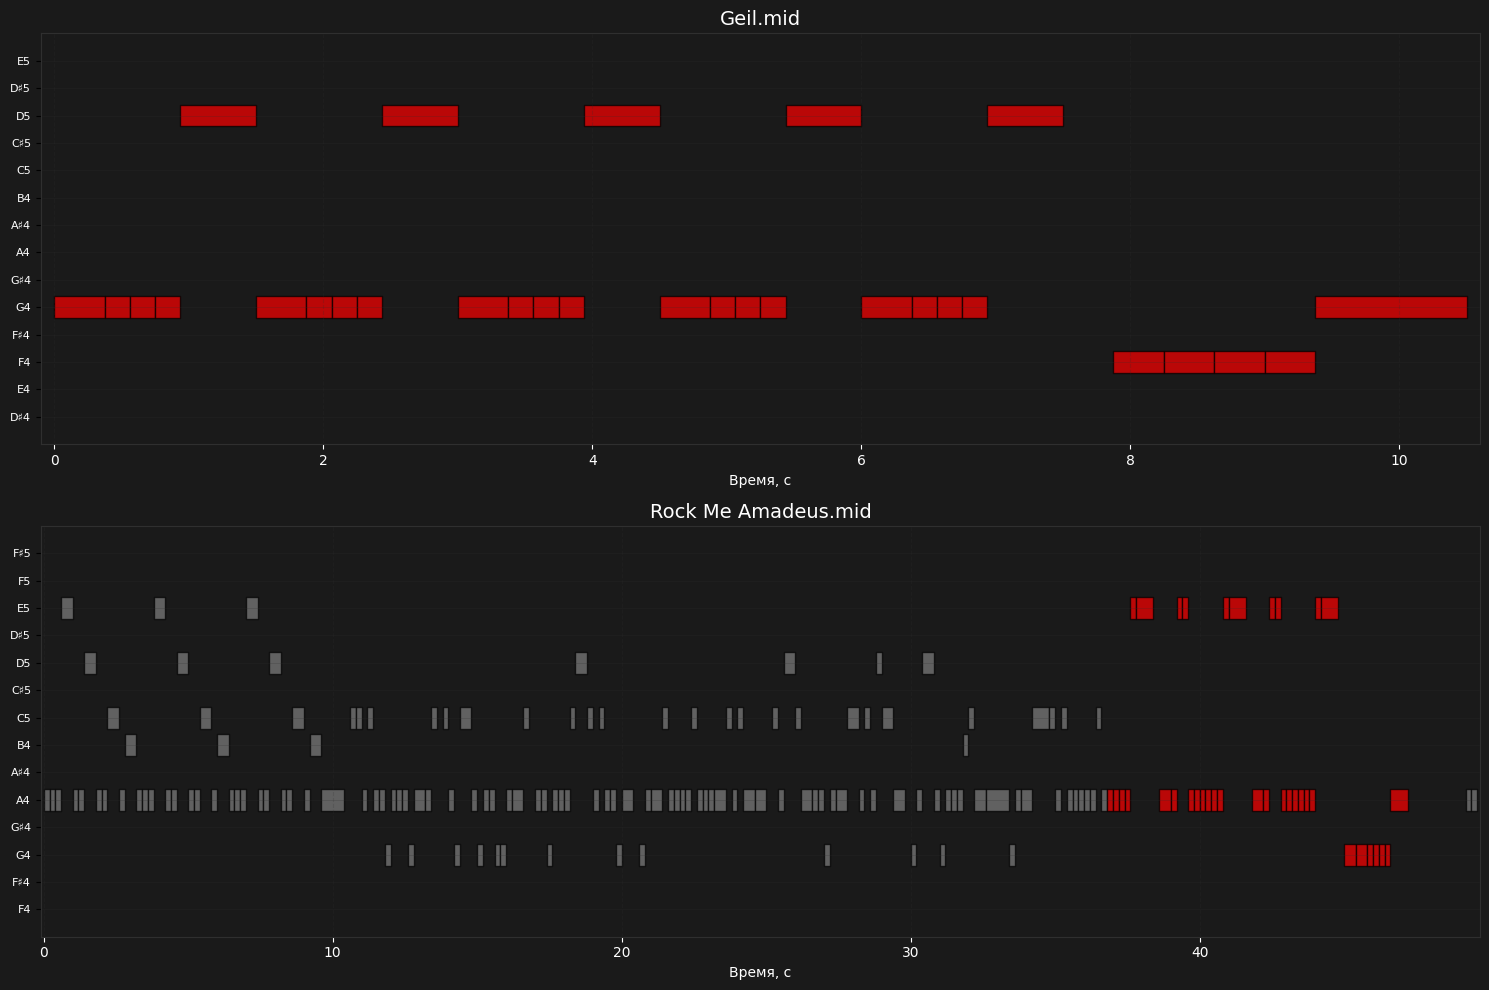

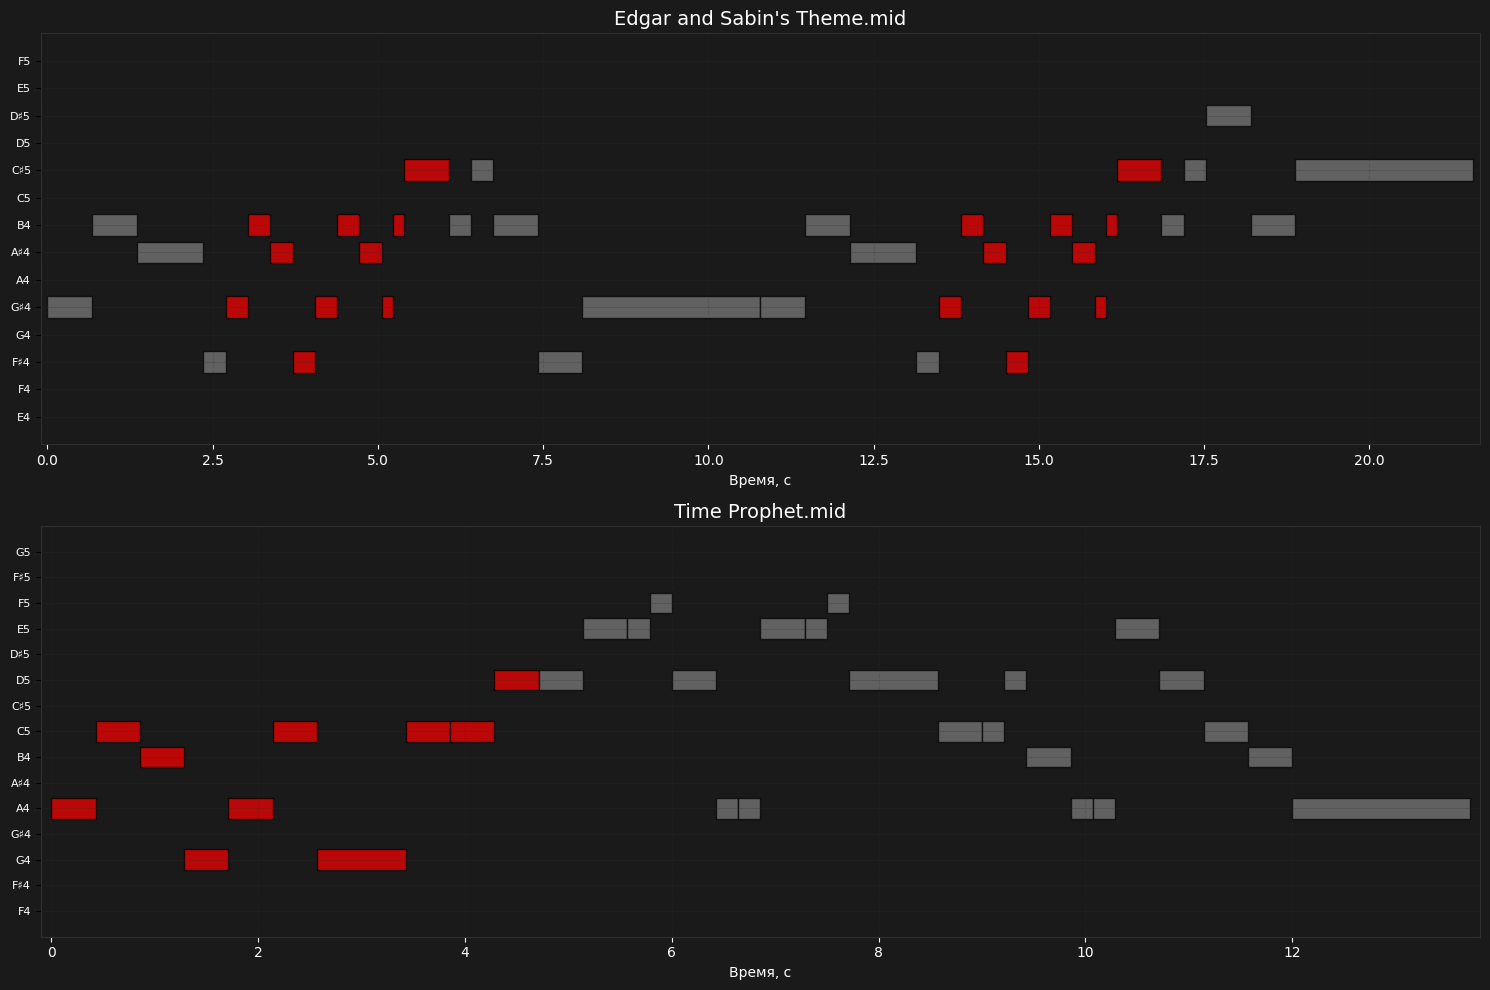

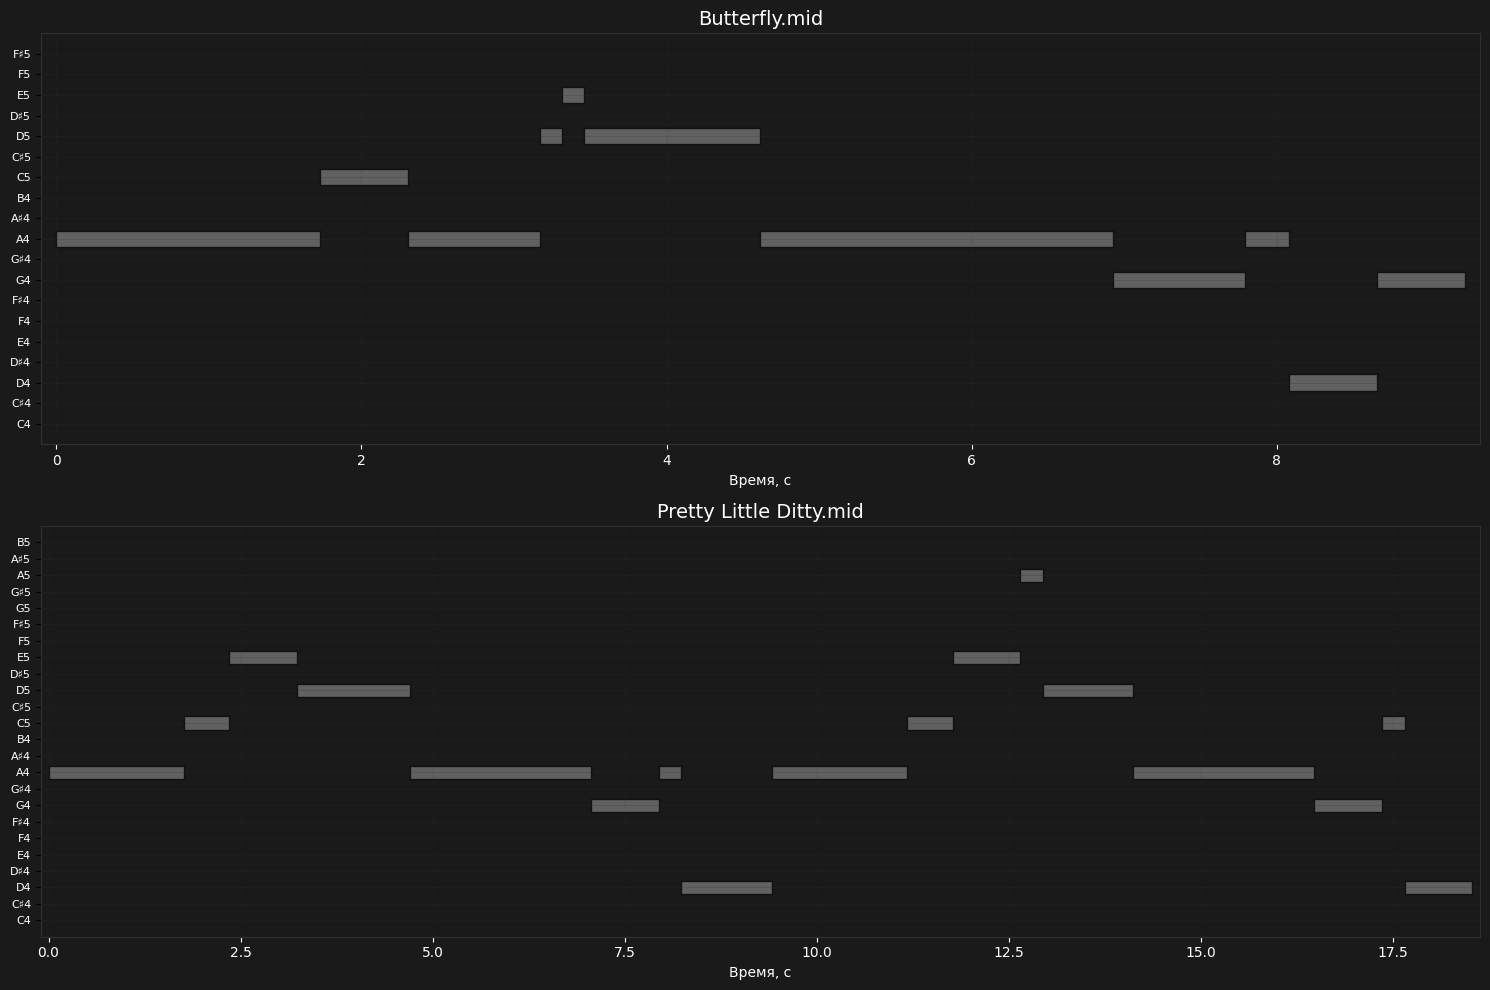

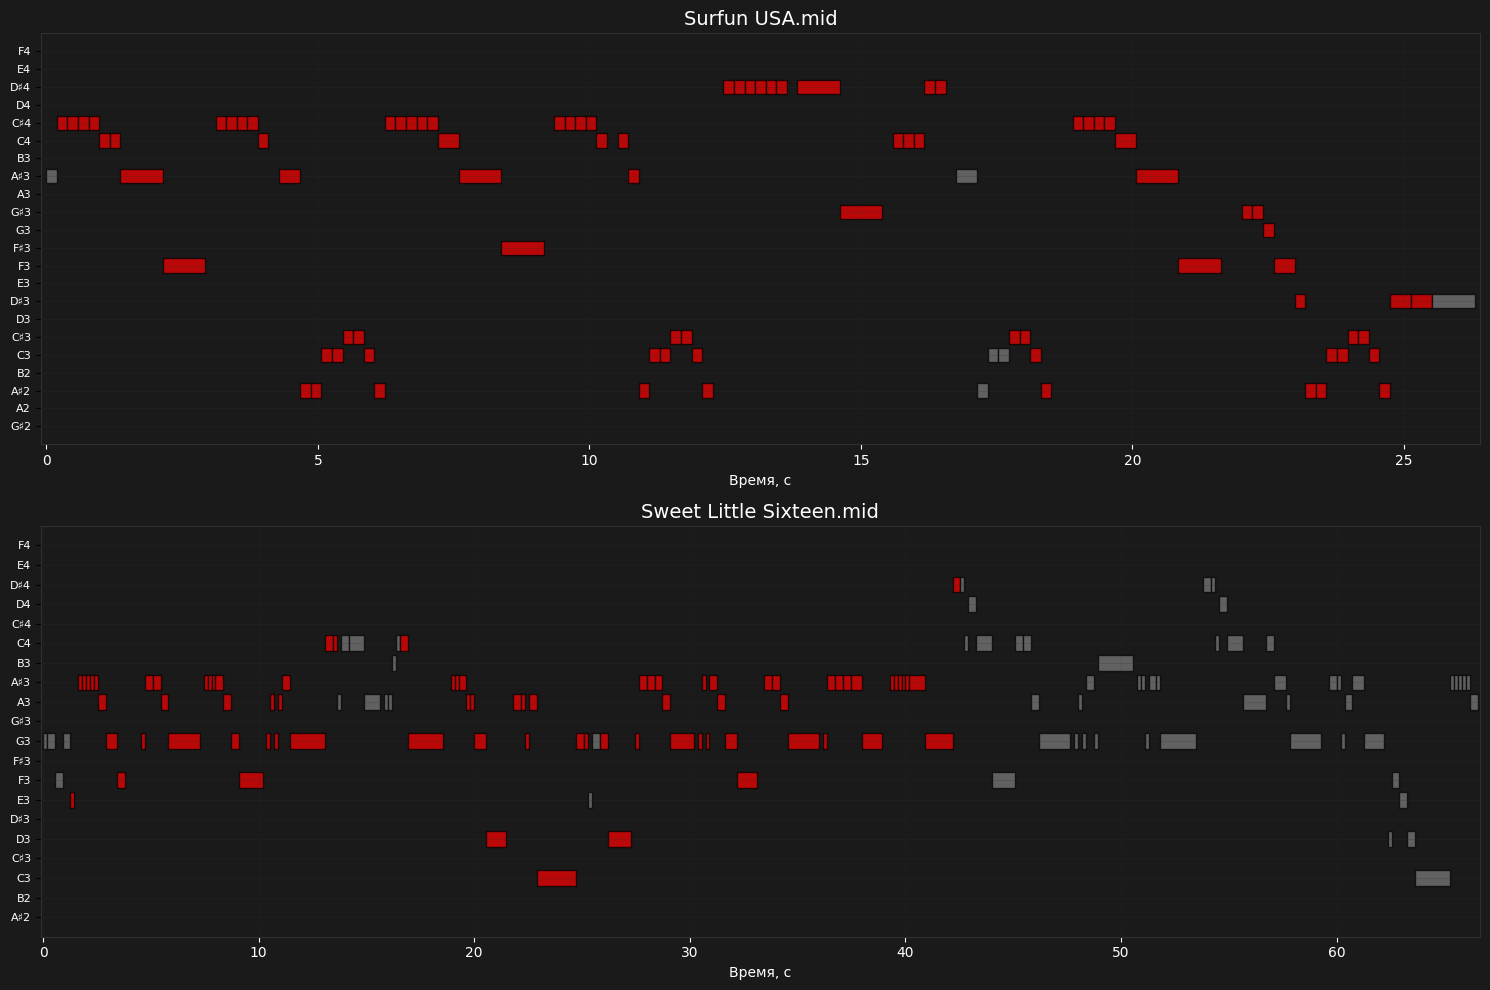

In [4]:
dataset = OverlapsDataset.from_path("..\\..\\datasets\\PlagiNet", preprocess_data=False)

for melody1_path, melody2_path in dataset.overlapping_pairs:

    melody1 = Melody.from_midi(melody1_path)
    melody2 = Melody.from_midi(melody2_path)

    matcher = SmithWatermanMelodyMatcher(melody1, melody2)
    patterns = matcher.find_patterns(
        min_length=MIN_LENGTH, 
        match_score=MATCH_SCORE, 
        mismatch_score=MISMATCH_SCORE, 
        gap_penalty=GAP_PENALTY, 
        tolerance=TOLERANCE,
        threshold_ratio=THRESHOLD_RATIO
    )
        
    matcher.visualize_matches(subplot_titles=(melody1_path.name, melody2_path.name), subplot_title_fontsize=14)